In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/GBP_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74258, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.32463,1.32469,1.32459,1.32476
2020-01-01 17:15:00,1.32469,1.32512,1.32457,1.32535
2020-01-01 17:30:00,1.32511,1.32502,1.32470,1.32512
2020-01-01 17:45:00,1.32510,1.32467,1.32458,1.32548
2020-01-01 18:00:00,1.32469,1.32568,1.32469,1.32608


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74257, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.32463,1.32469,1.32459,1.32476,1.32512,17,2,1,-0.00006,1.324675,0.00017,1.324667
2020-01-01 17:15:00,1.32469,1.32512,1.32457,1.32535,1.32502,17,2,1,-0.00043,1.324960,0.00078,1.324933
2020-01-01 17:30:00,1.32511,1.32502,1.32470,1.32512,1.32467,17,2,1,0.00009,1.324910,0.00042,1.324987
2020-01-01 17:45:00,1.32510,1.32467,1.32458,1.32548,1.32568,17,2,1,0.00043,1.325030,0.00090,1.324958
2020-01-01 18:00:00,1.32469,1.32568,1.32469,1.32608,1.32536,18,2,1,-0.00099,1.325385,0.00139,1.325285


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.32463,1.32469,1.32459,1.32476,1.32512,17,2,1,-0.00006,1.324675,0.00017,1.324667,-25.513439
2020-01-01 17:15:00,1.32469,1.32512,1.32457,1.32535,1.32502,17,2,1,-0.00043,1.324960,0.00078,1.324933,-25.513405
2020-01-01 17:30:00,1.32511,1.32502,1.32470,1.32512,1.32467,17,2,1,0.00009,1.324910,0.00042,1.324987,-25.513407
2020-01-01 17:45:00,1.32510,1.32467,1.32458,1.32548,1.32568,17,2,1,0.00043,1.325030,0.00090,1.324958,-25.513433
2020-01-01 18:00:00,1.32469,1.32568,1.32469,1.32608,1.32536,18,2,1,-0.00099,1.325385,0.00139,1.325285,-25.513622


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.32463  1.32459  1.32476         1.32512    17    2   
2020-01-01 17:15:00  1.32469  1.32457  1.32535         1.32502    17    2   
2020-01-01 17:30:00  1.32511  1.32470  1.32512         1.32467    17    2   
2020-01-01 17:45:00  1.32510  1.32458  1.32548         1.32568    17    2   
2020-01-01 18:00:00  1.32469  1.32469  1.32608         1.32536    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00006   1.324675  0.00017    1.324667 -25.513439  
2020-01-01 17:15:00     1  -0.00043   1.324960  0.00078    1.324933 -25.513405  
2020-01-01 17:30:00     1   0.00009   1.324910  0.00042    1.324987 -25.513407  
2020-01-01 17:45:00     1   0.00043   1.325030  0.00090

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59405
59405
7500
7500
7352
7352


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(59405, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59380, 24, 12)
(7475, 24, 12)
(7327, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59380, 1)
(7475, 1)
(7327, 1)


array([[0.6350293 ],
       [0.6348872 ],
       [0.6361966 ],
       ...,
       [0.39192724],
       [0.39235163],
       [0.39599514]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.6350293 , 0.6348872 , 0.6361966 , ..., 0.39192724, 0.39235163,
       0.39599514], dtype=float32)

In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/Thesis Dataset/GBP15minGRU1.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 14.5399 - mae: 1.7381 - mse: 14.5399 - root_mean_squared_error: 3.8131 - mape: 35777.5000
Epoch 1: val_mse improved from inf to 0.23302, saving model to /content/drive/MyDrive/Thesis Dataset/GBP15minGRU1.hdf5
464/464 [==============================] - 108s 215ms/step - loss: 14.5399 - mae: 1.7381 - mse: 14.5399 - root_mean_squared_error: 3.8131 - mape: 35777.5000 - val_loss: 0.2330 - val_mae: 0.4227 - val_mse: 0.2330 - val_root_mean_squared_error: 0.4827 - val_mape: 130952.6016
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0729 - mae: 0.2104 - mse: 0.0729 - root_mean_squared_error: 0.2700 - mape: 12929.2920
Epoch 2: val_mse improved from 0.23302 to 0.08303, saving model to /content/drive/MyDrive/Thesis Dataset/GBP15minGRU1.hdf5
464/464 [==============================] - 98s 212ms/step - loss: 0.0729 - mae: 0.2104 - mse: 0.0729 - root_mean_squared_error: 0.2700 - mape: 12929.2920 - val_loss: 

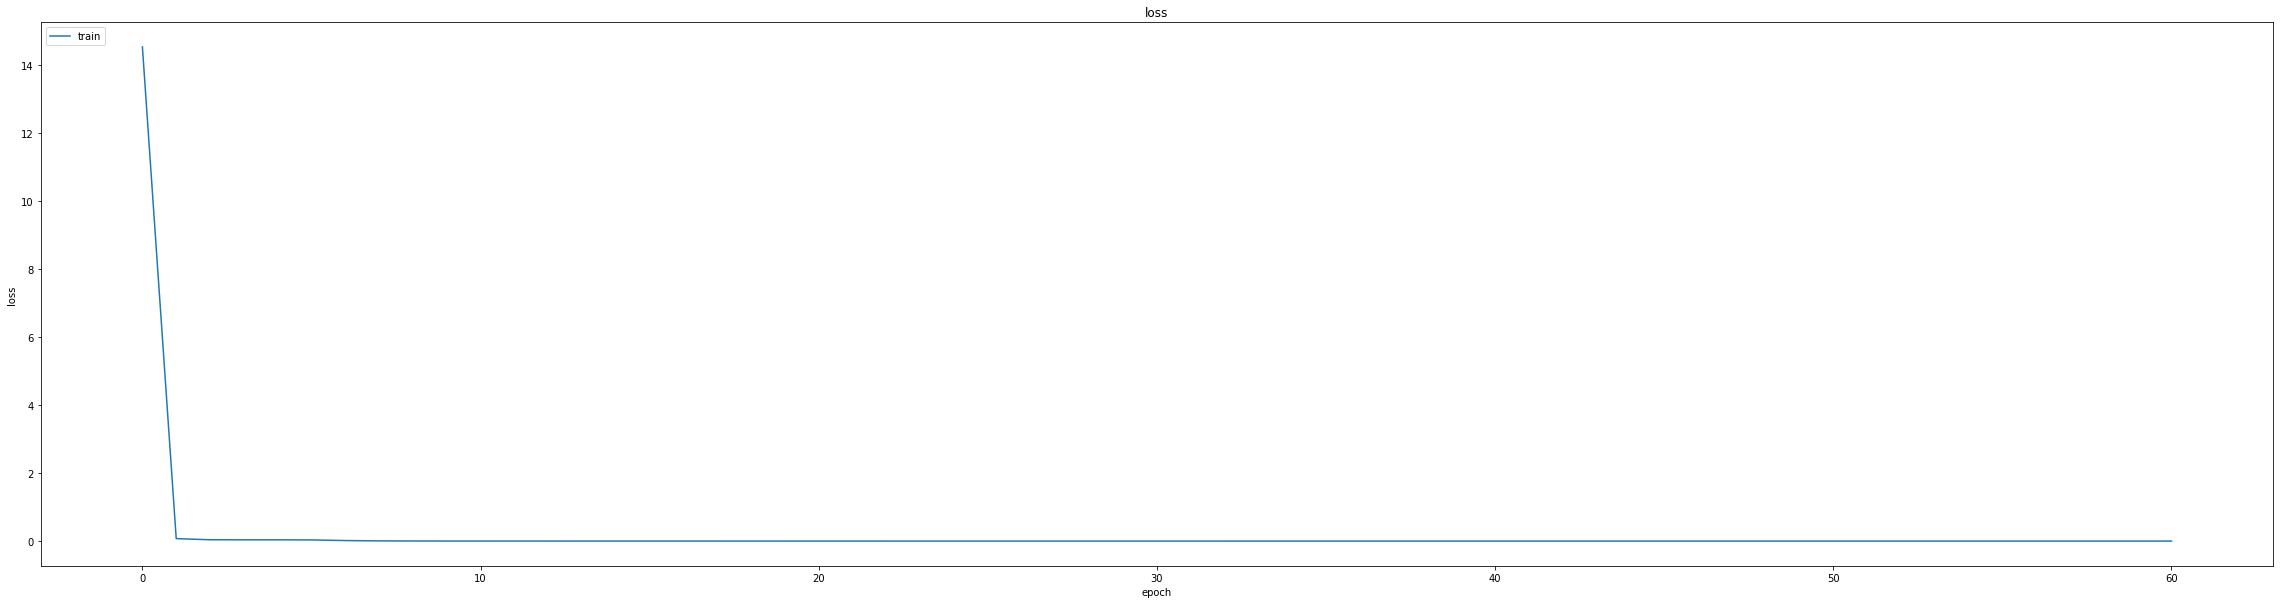

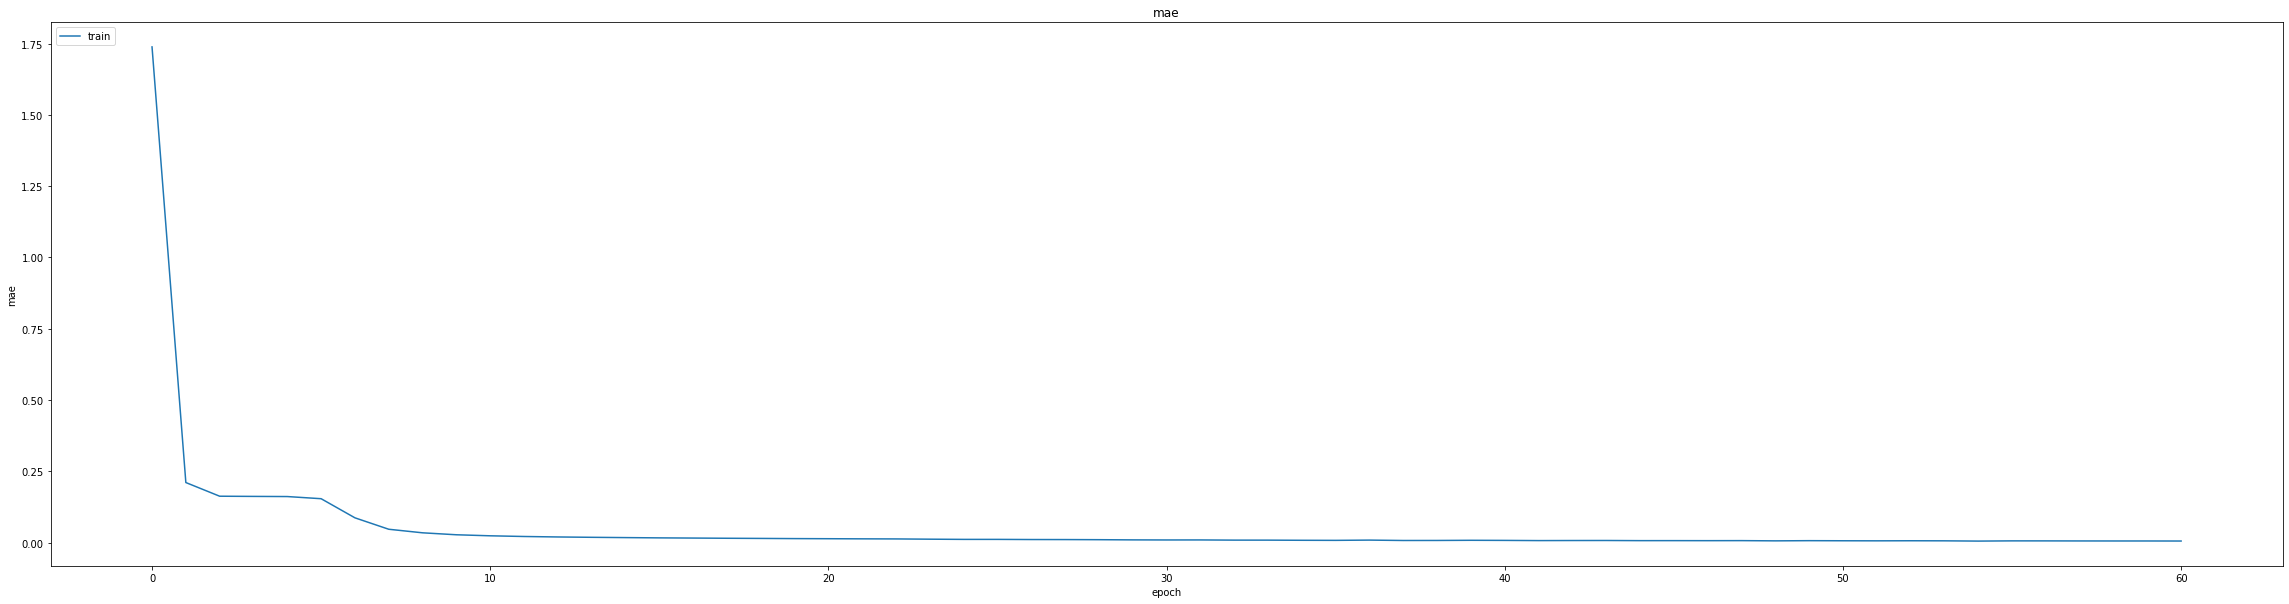

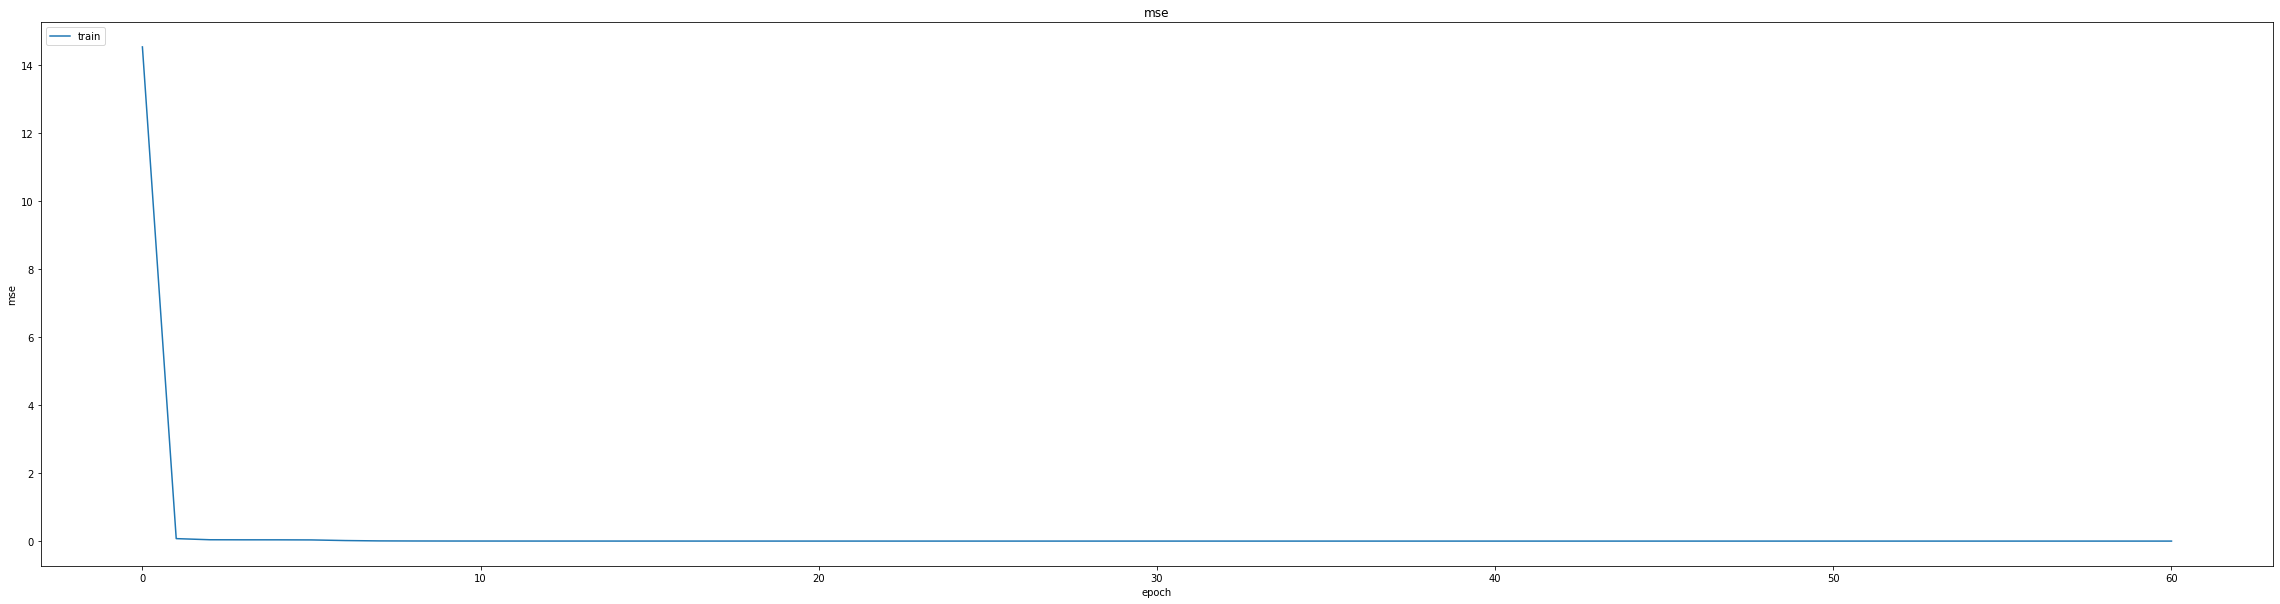

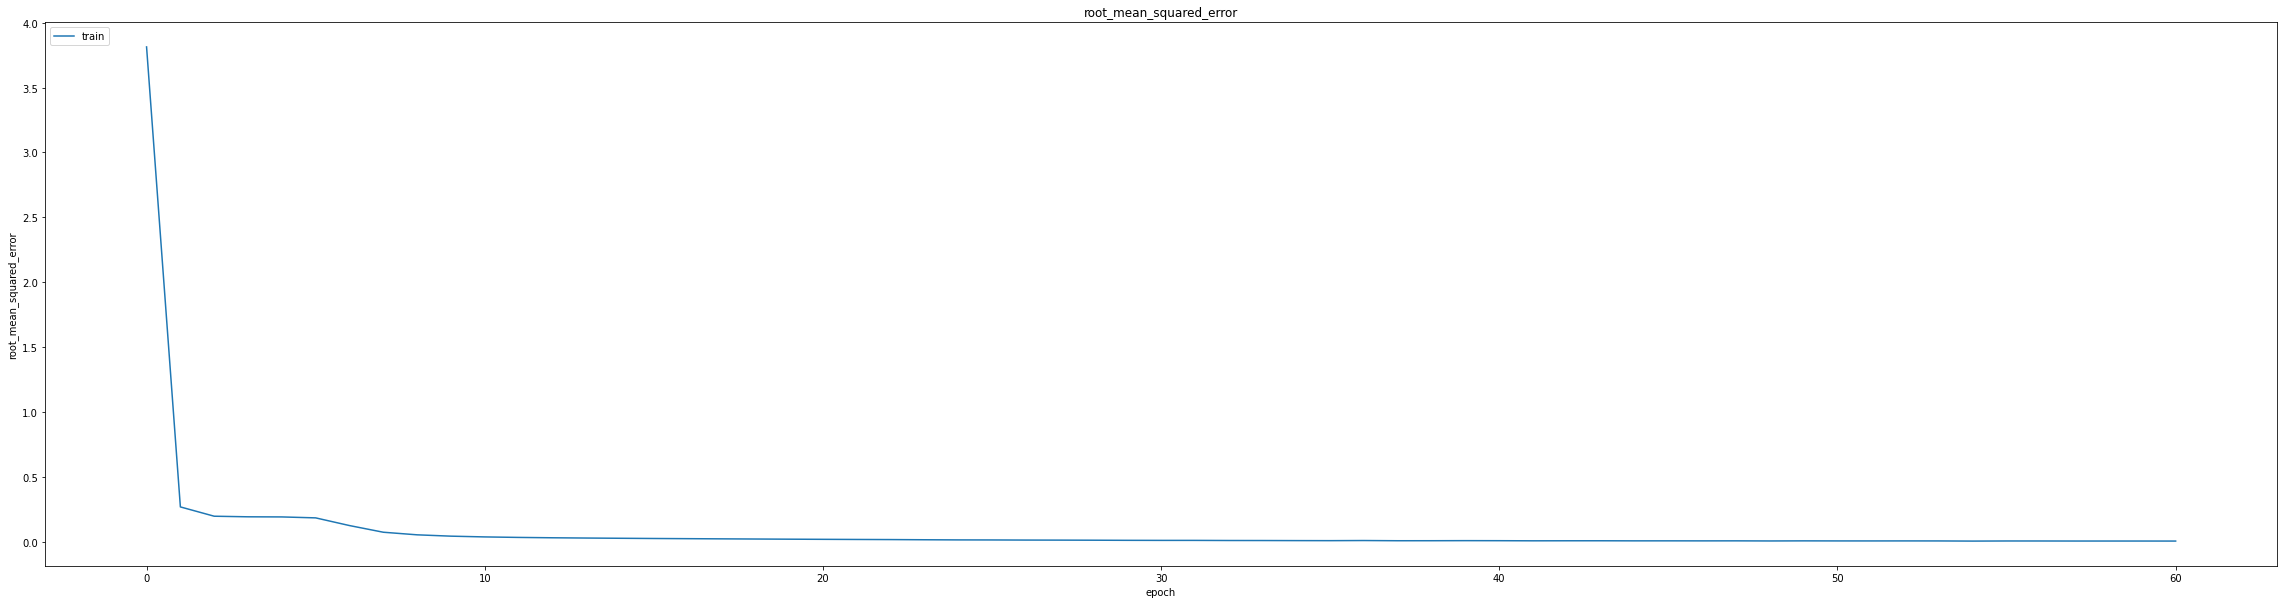

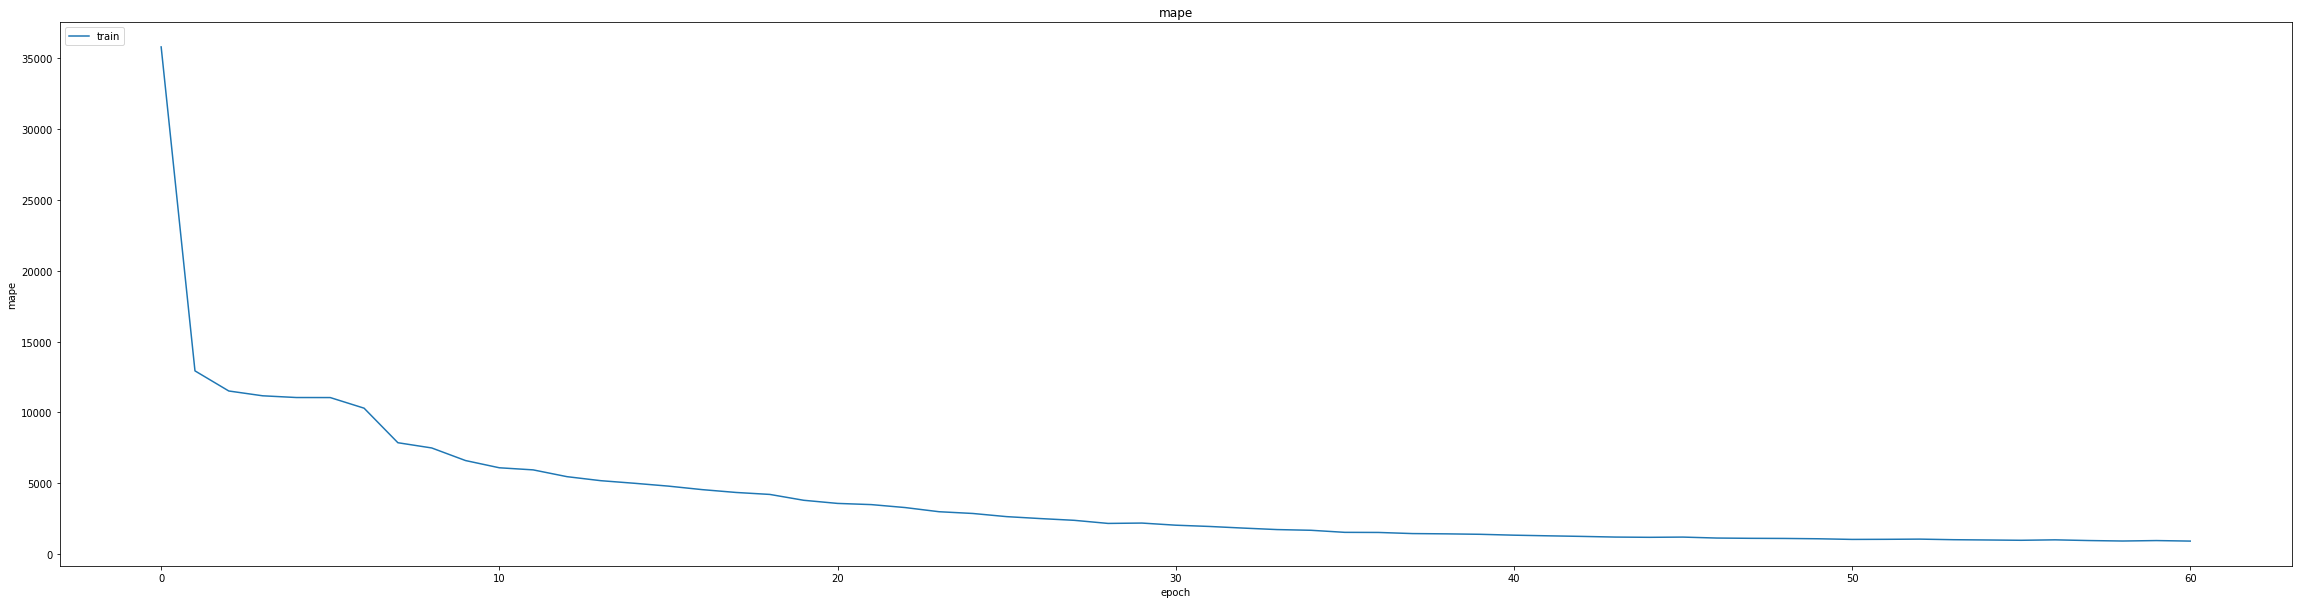

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.024142764508724213
0.029796572402119637
234/234 [==============================] - 8s 29ms/step
0.9650226783936221


In [ ]:
model.load_weights("/content/drive/MyDrive/Thesis Dataset/GBP15minGRU1.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 5.5775e-04 - mae: 0.0122 - mse: 5.5775e-04 - root_mean_squared_error: 0.0236 - mape: 1855.5736
Epoch 1: val_mse did not improve from 0.00089
464/464 [==============================] - 120s 244ms/step - loss: 5.5775e-04 - mae: 0.0122 - mse: 5.5775e-04 - root_mean_squared_error: 0.0236 - mape: 1855.5736 - val_loss: 0.0013 - val_mae: 0.0303 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mape: 14732.0654 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.1032e-04 - mae: 0.0079 - mse: 1.1032e-04 - root_mean_squared_error: 0.0105 - mape: 1632.4056
Epoch 2: val_mse improved from 0.00089 to 0.00081, saving model to /content/drive/MyDrive/Thesis Dataset/GBP15minGRU1.hdf5
464/464 [==============================] - 103s 222ms/step - loss: 1.1032e-04 - mae: 0.0079 - mse: 1.1032e-04 - root_mean_squared_error: 0.0105 - mape: 1632.4056 - val_loss: 8.0710e-04 - val_mae: 0.0237 - val_m

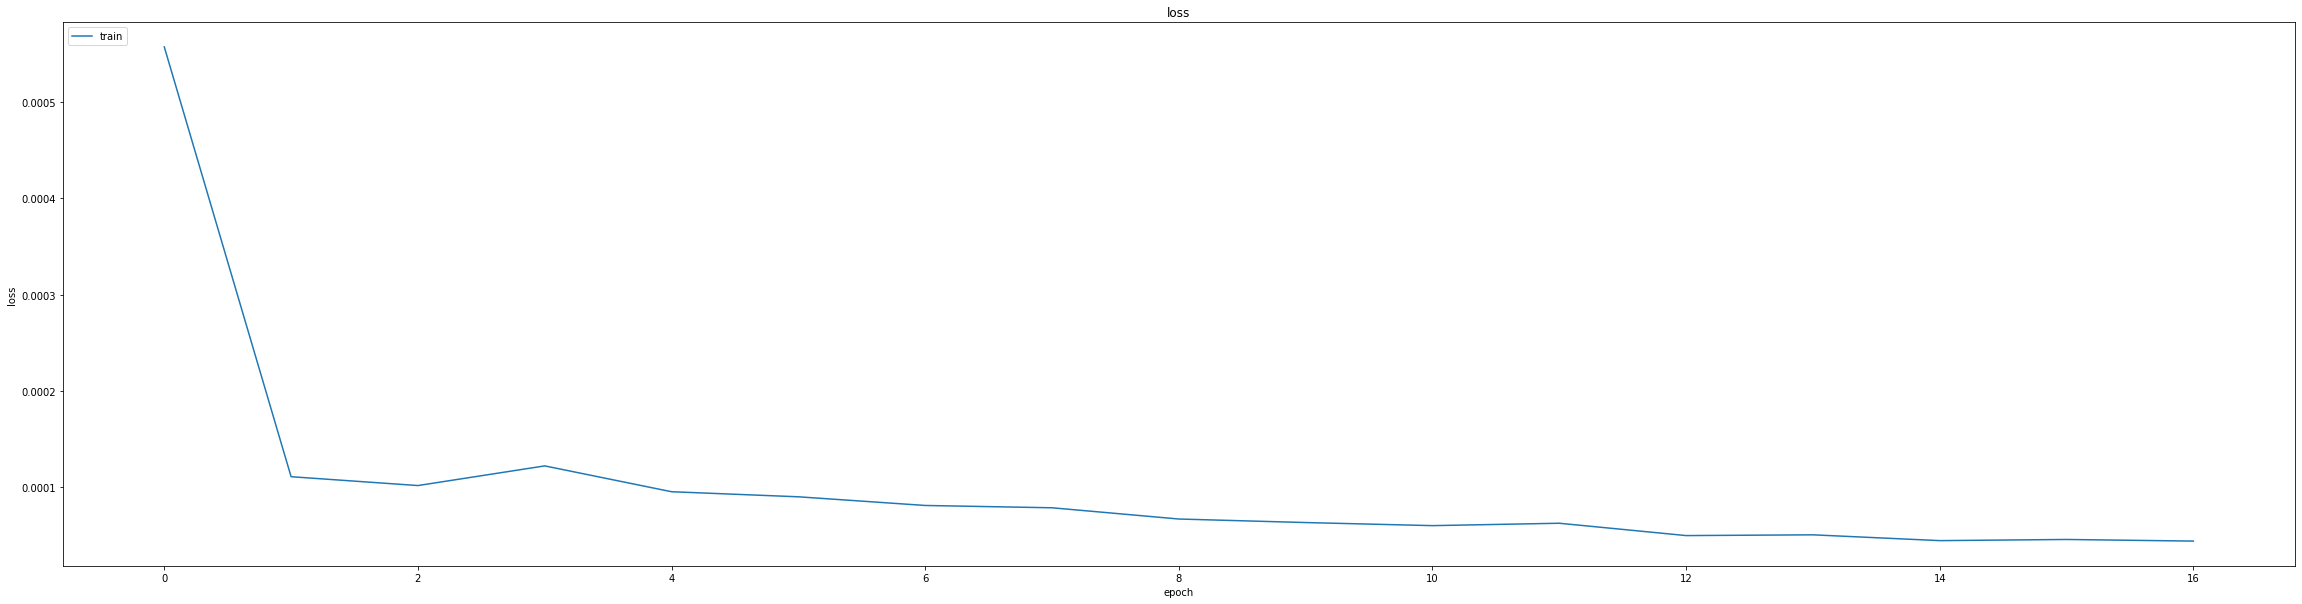

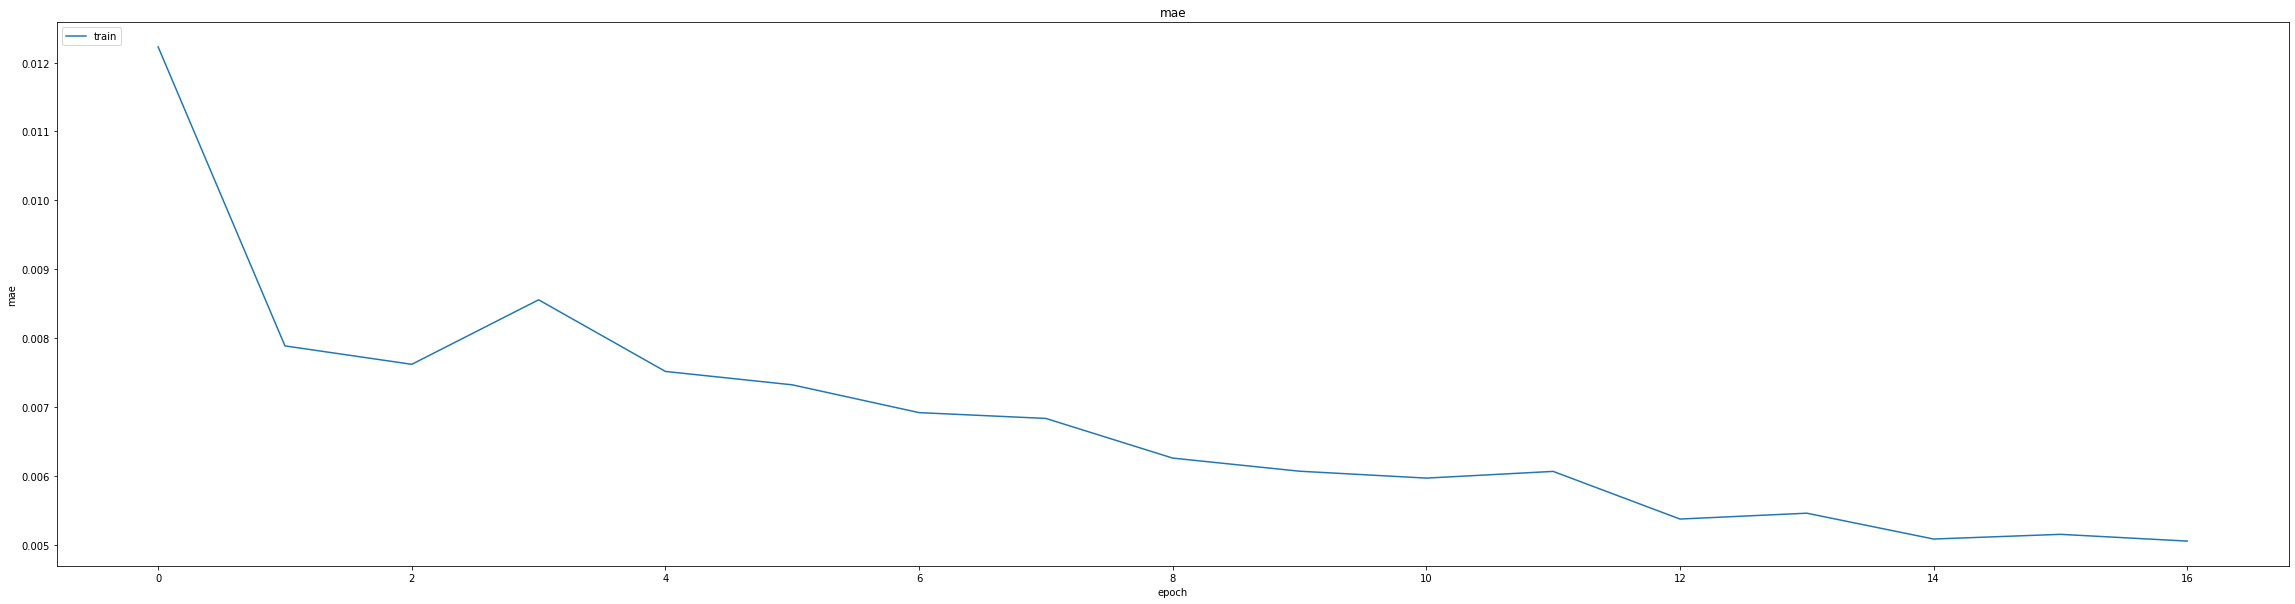

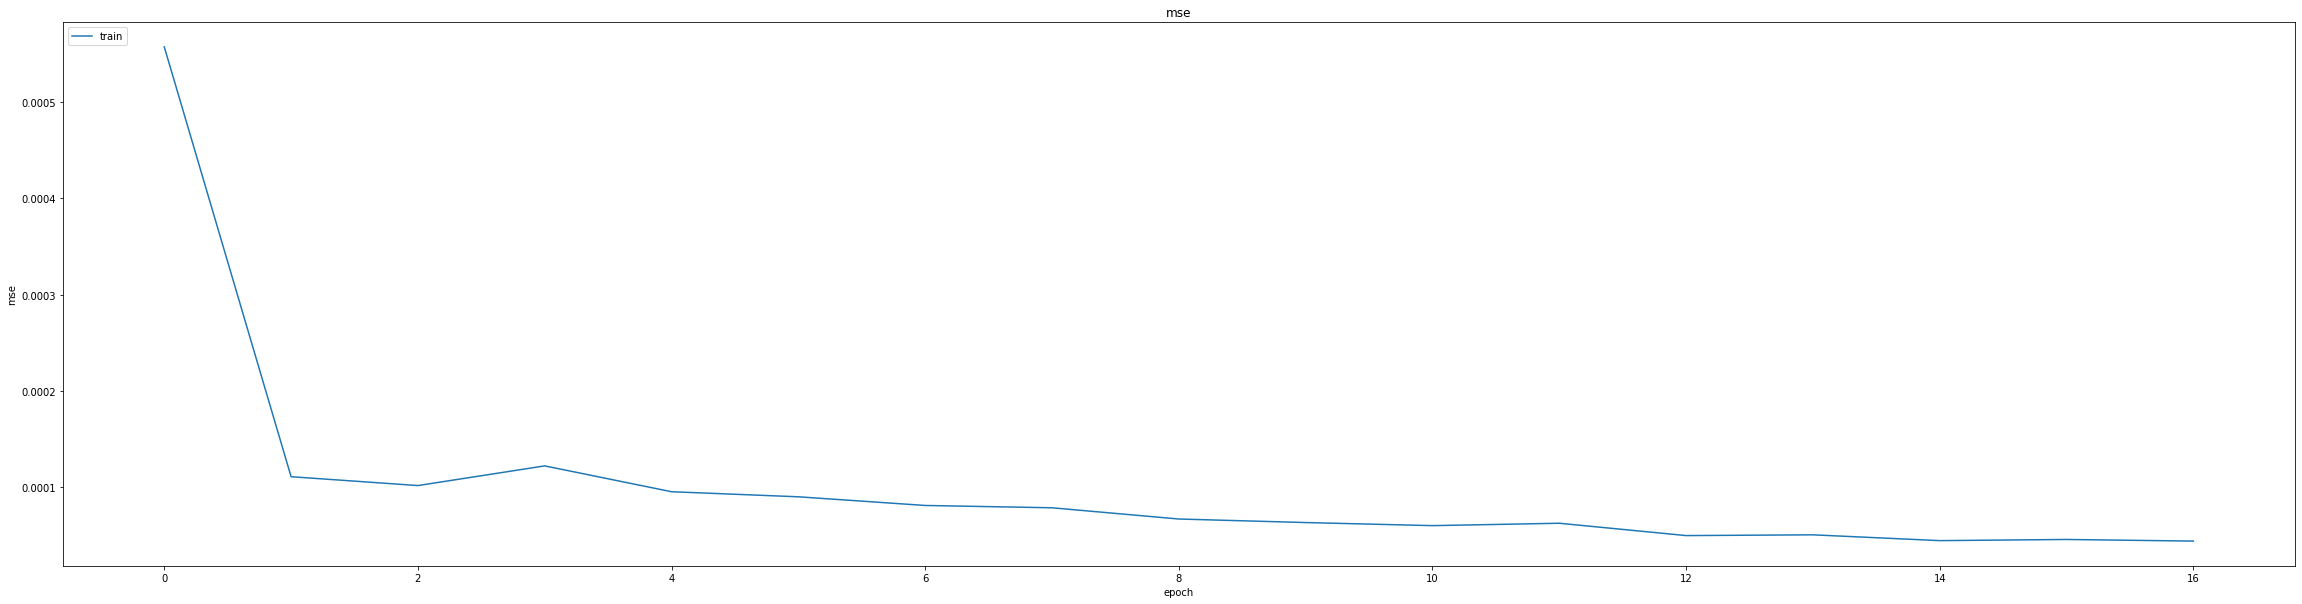

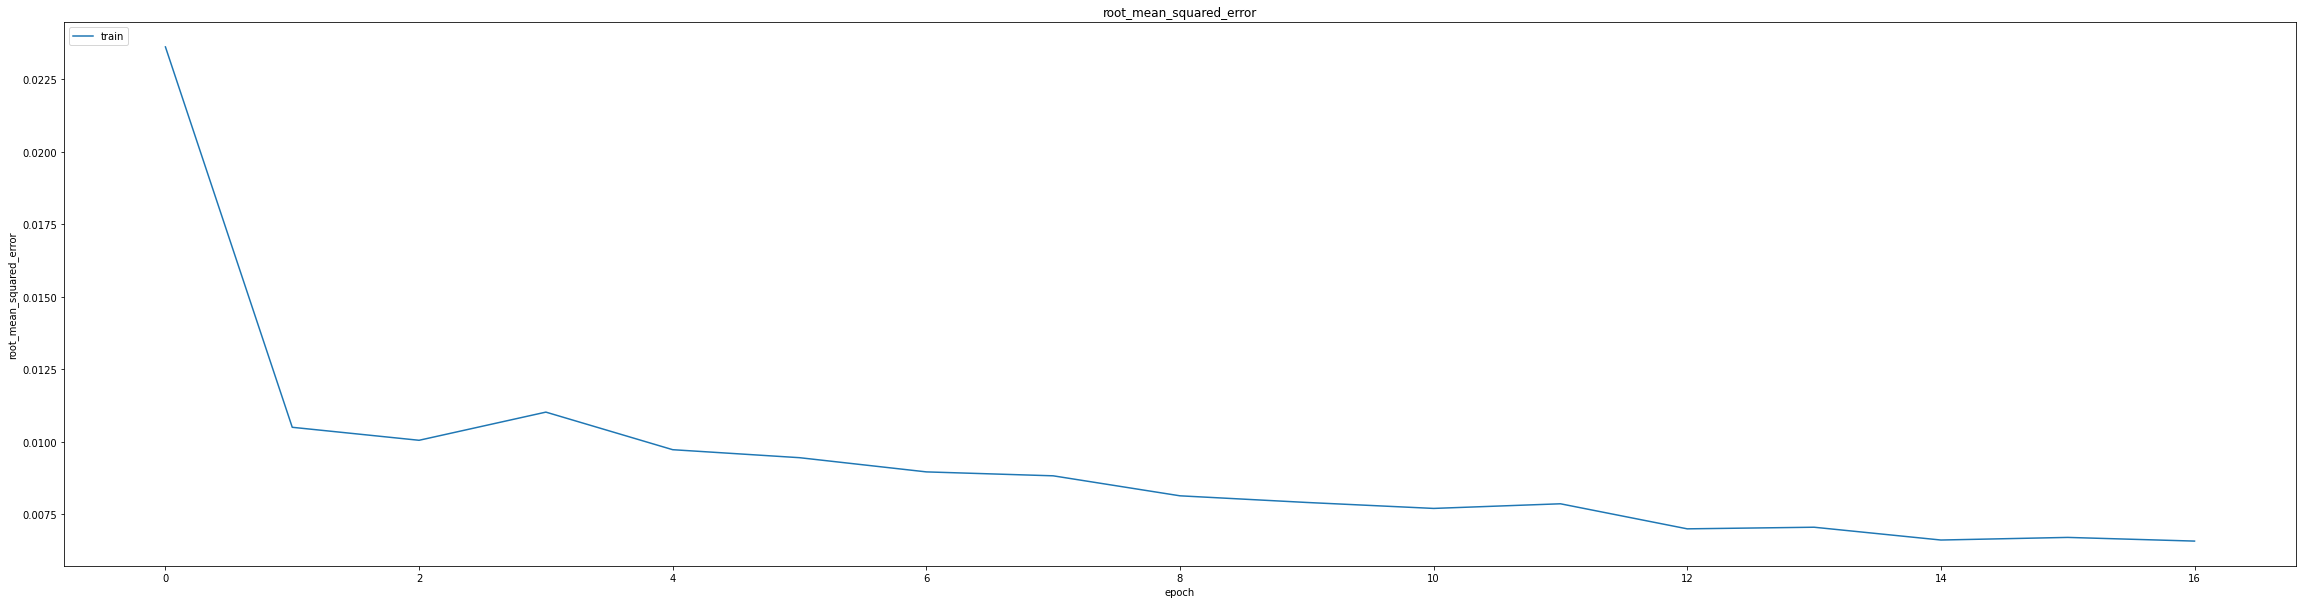

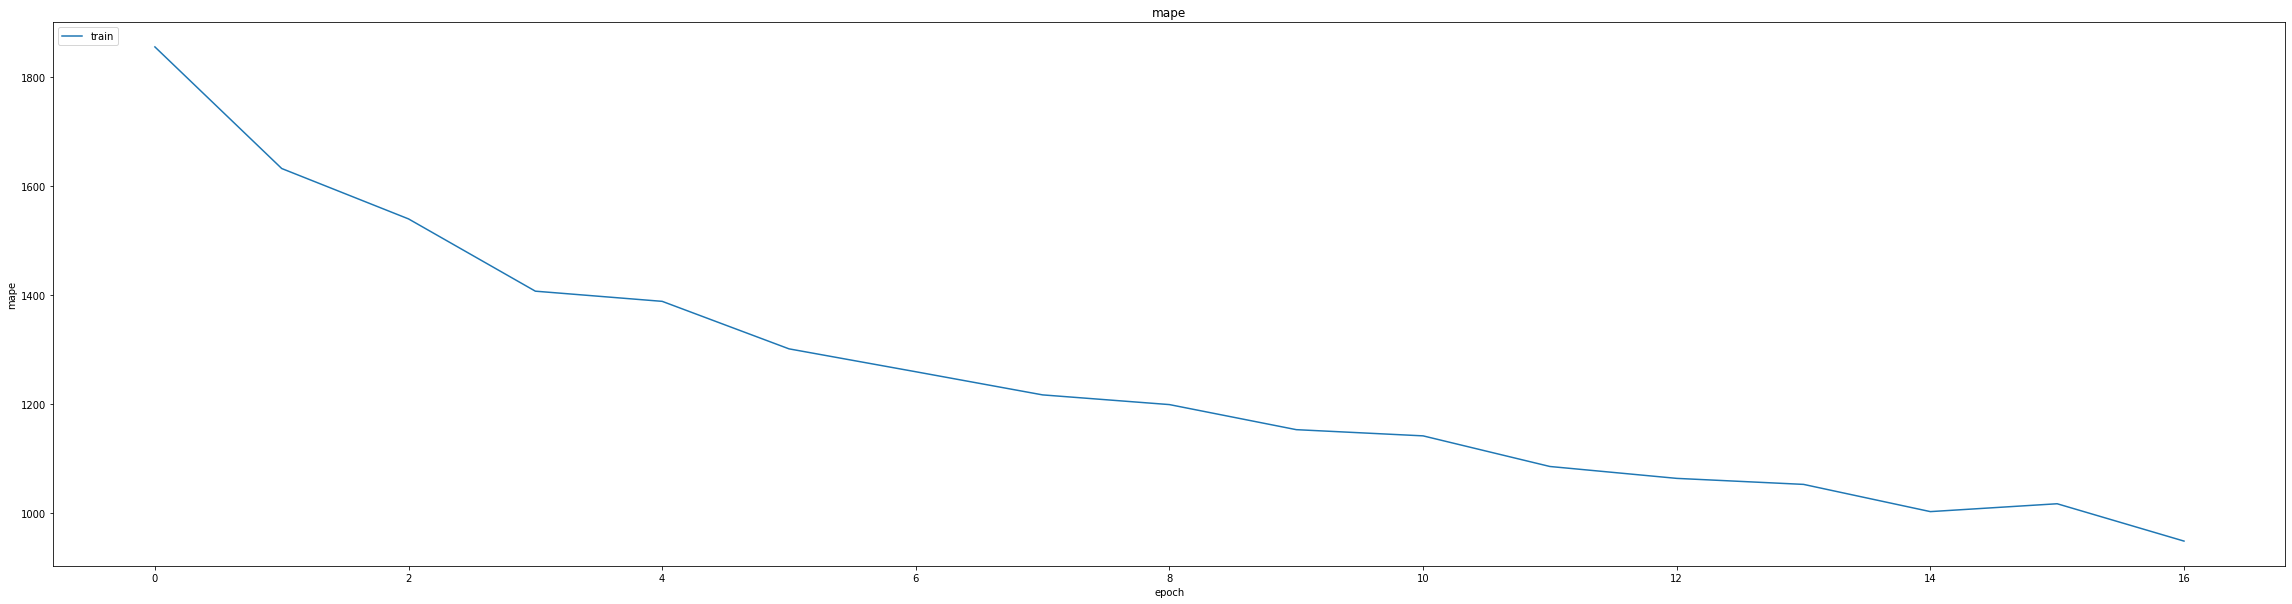

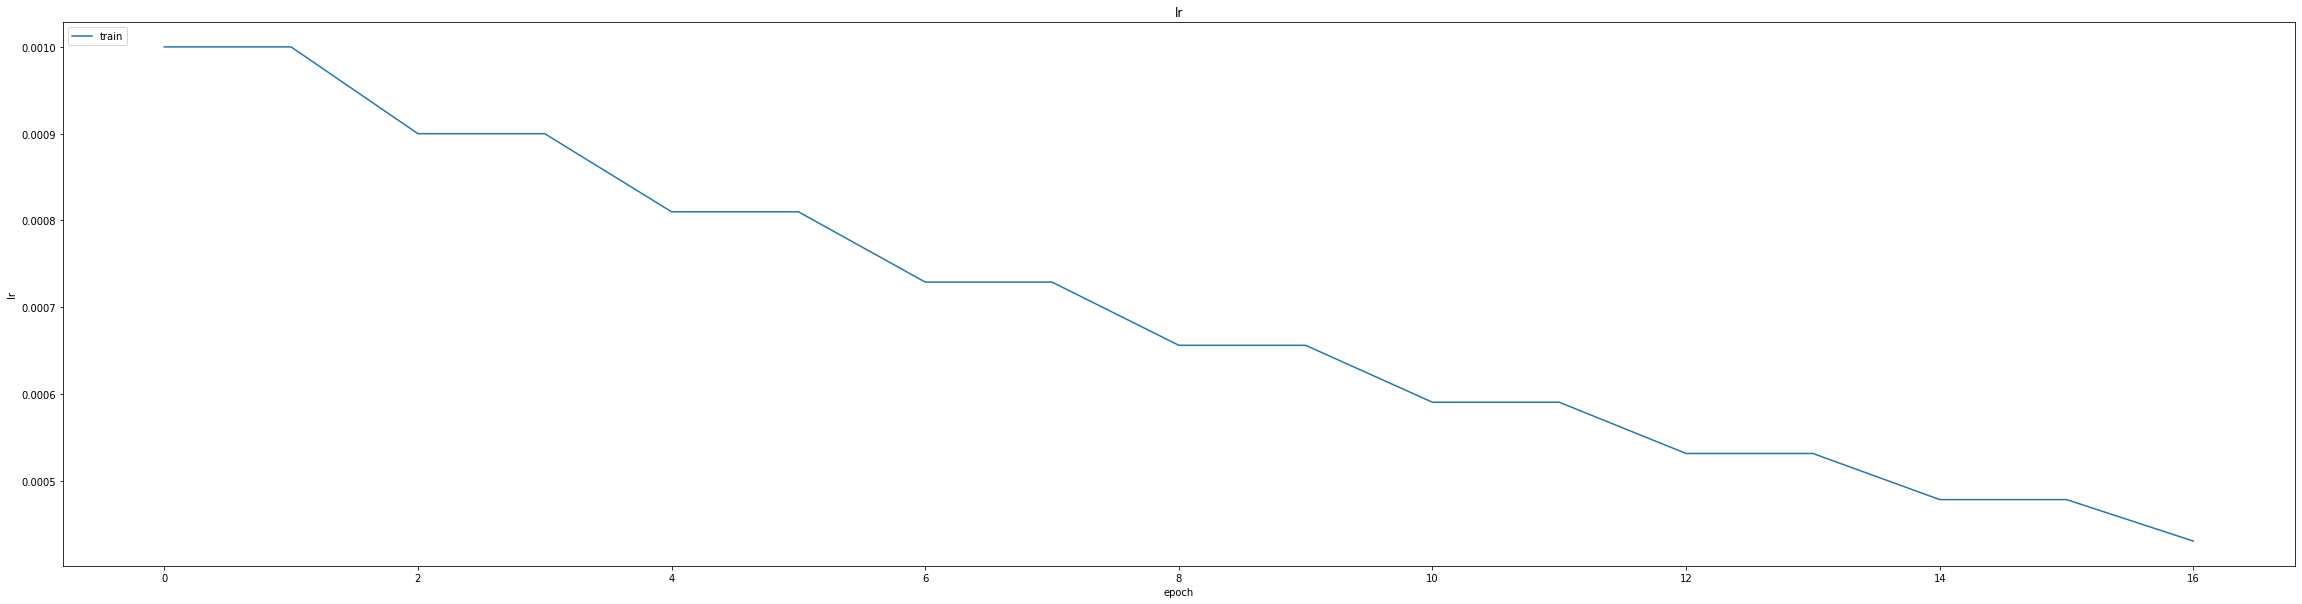

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.023669039830565453
0.02840958535671234
234/234 [==============================] - 7s 29ms/step
0.9852186948252466


234/234 [==============================] - 7s 28ms/step


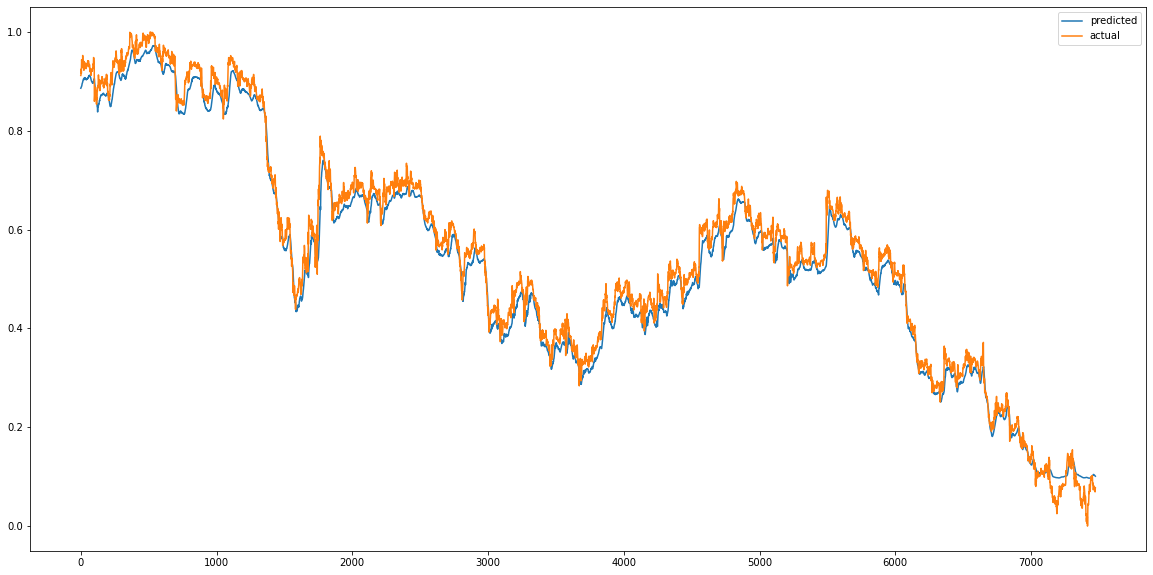

In [ ]:
model.load_weights("/content/drive/MyDrive/Thesis Dataset/GBP15minGRU1.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


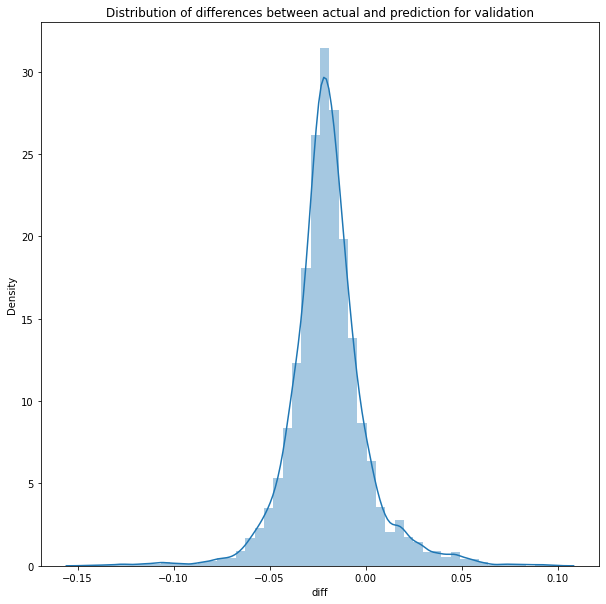

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 7s 29ms/step


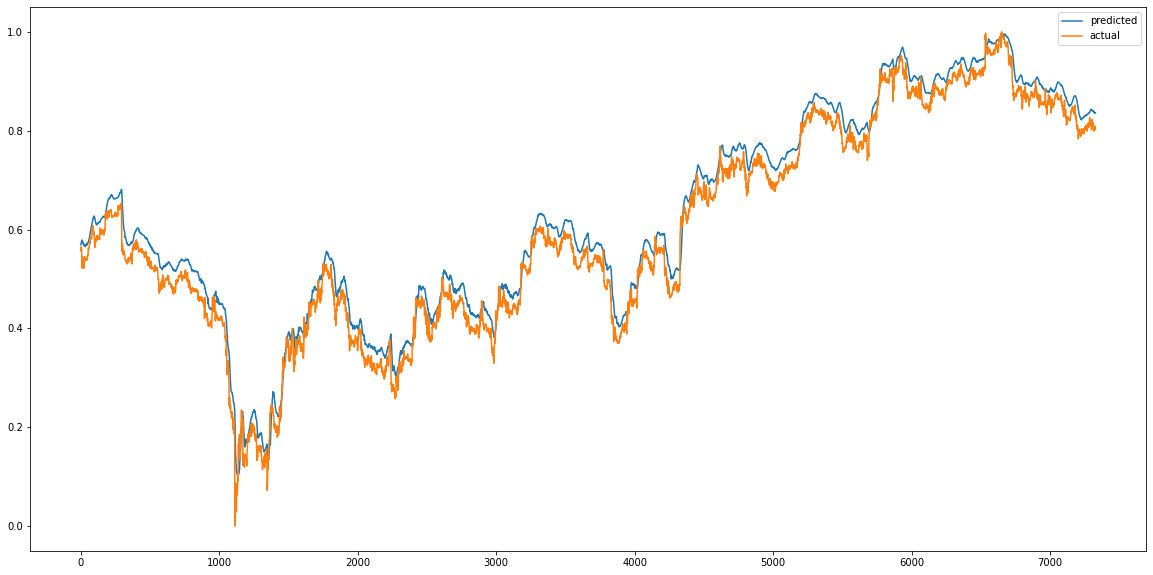

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


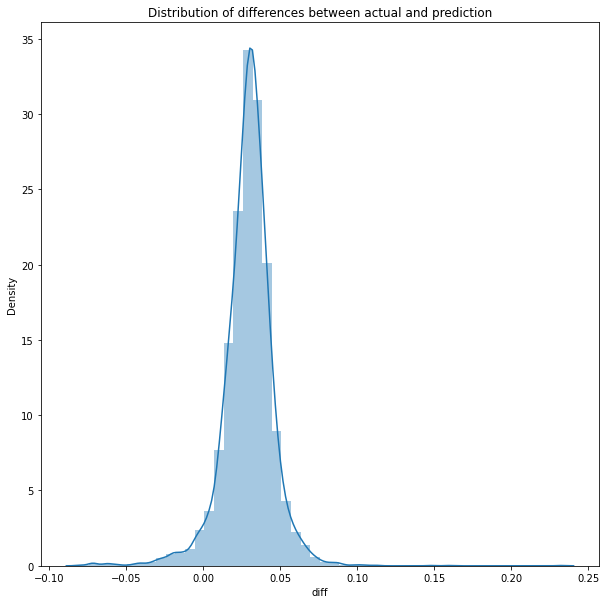

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0011216512116204
MAE :  0.030548895189979157
RMSE  : 0.03349106166756139
229/229 [==============================] - 7s 29ms/step
R2_Score  : 0.9753838666399519


count    7327.000000
mean        0.029127
std         0.016531
min        -0.080584
25%         0.021805
50%         0.030132
75%         0.037811
max         0.232007
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          164864    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 455.8394 - mae: 3.4060 - mse: 455.8394 - root_mean_squared_error: 21.3504 - mape: 12902.9766
Epoch 1: val_mse improved from inf to 0.06681, saving model to weights.best.hdf5
464/464 [==============================] - 143s 287ms/step - loss: 455.8394 - mae: 3.4060 - mse: 455.8394 - root_mean_squared_error: 21.3504 - mape: 12902.9766 - val_loss: 0.0668 - val_mae: 0.2073 - val_mse: 0.0668 - val_root_mean_squared_error: 0.2585 - val_mape: 90163.7891
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0423 - mae: 0.1705 - mse: 0.0423 - root_mean_squared_error: 0.2057 - mape: 13358.0947
Epoch 2: val_mse improved from 0.06681 to 0.06366, saving model to weights.best.hdf5
464/464 [==============================] - 131s 282ms/step - loss: 0.0423 - mae: 0.1705 - mse: 0.0423 - root_mean_squared_error: 0.2057 - mape: 13358.0947 - val_loss: 0.0637 - val_mae: 0.2013 - val_mse: 0.0637 - val_root_mean_squared_err

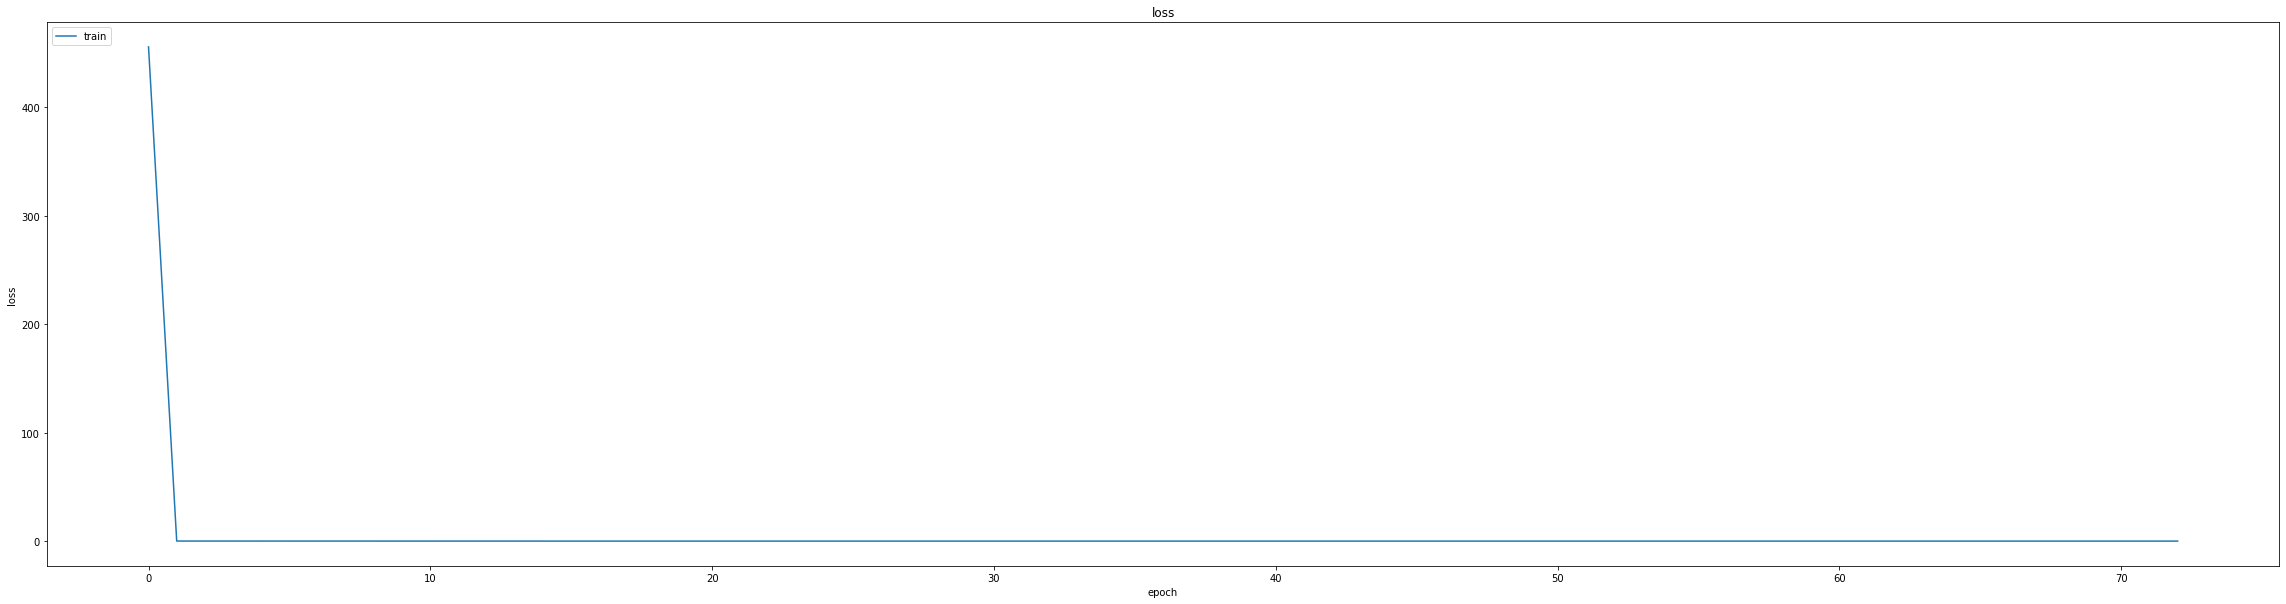

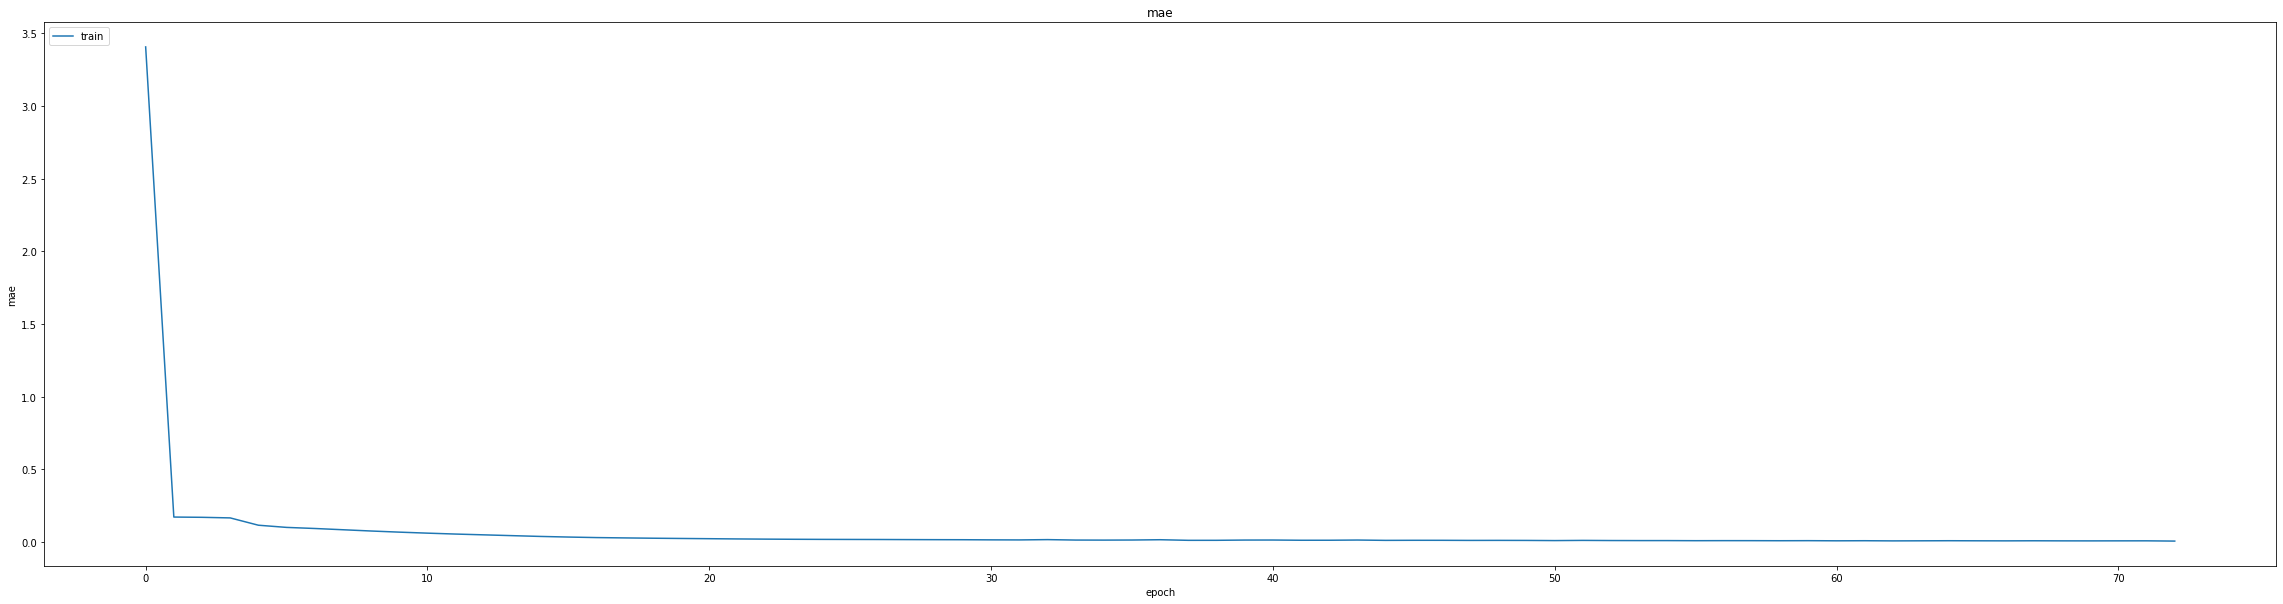

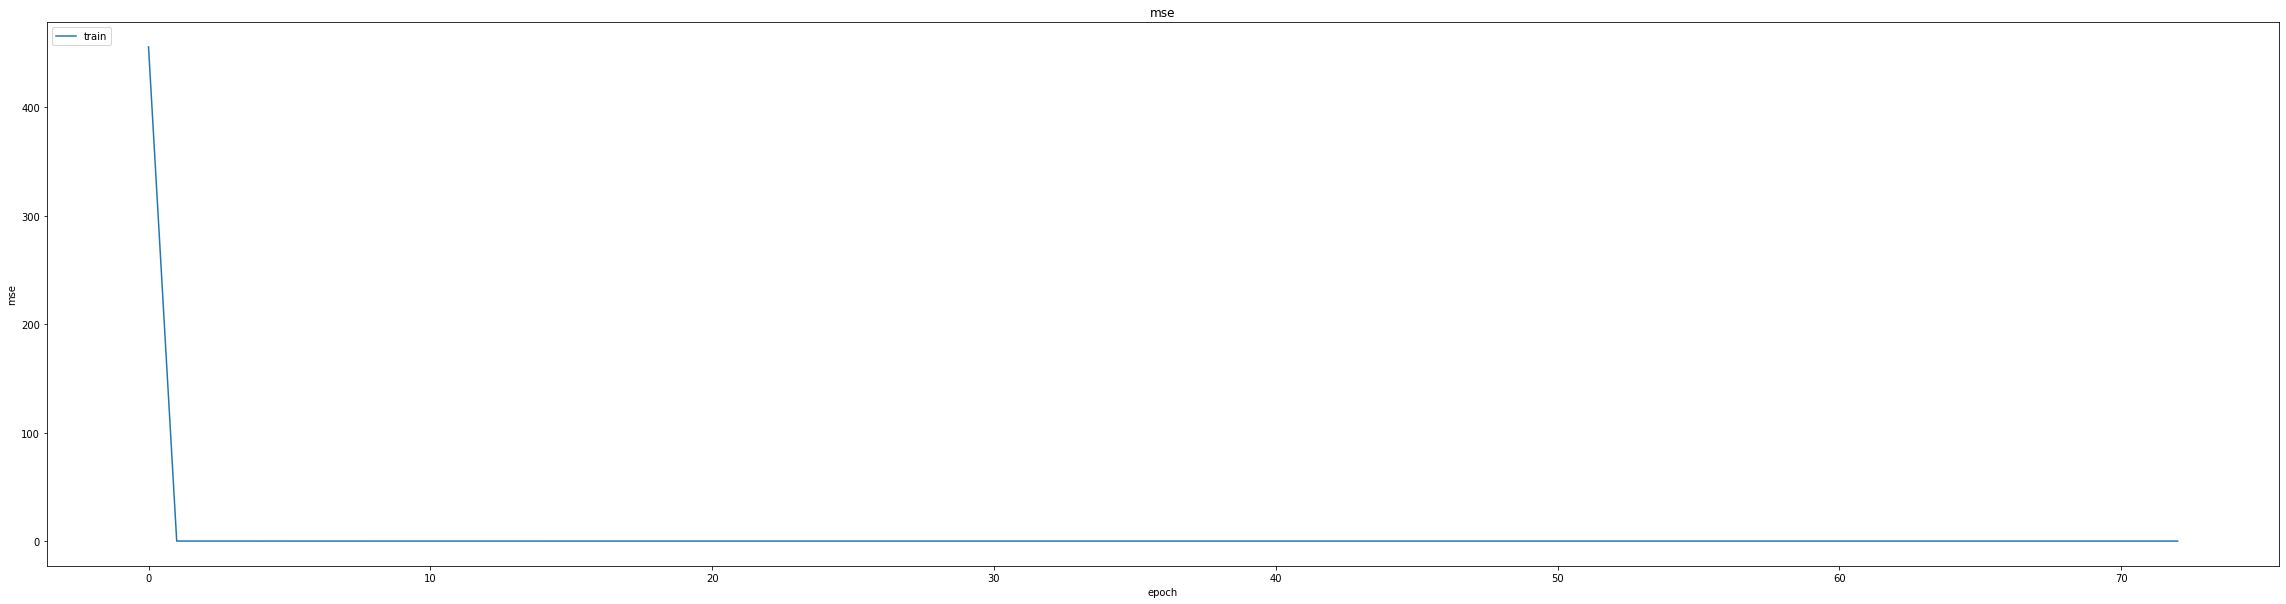

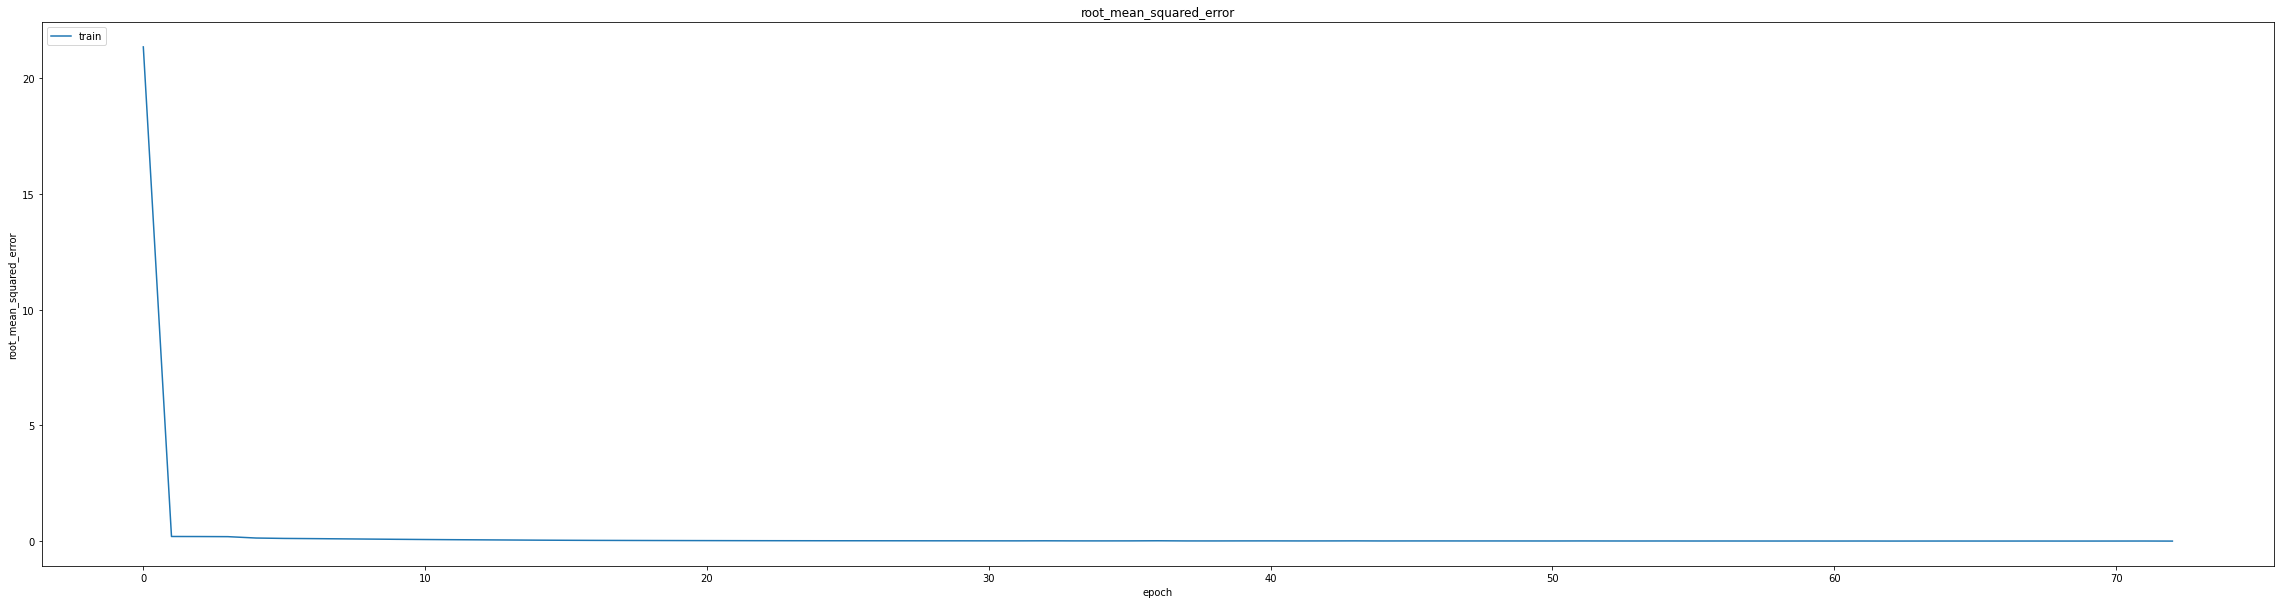

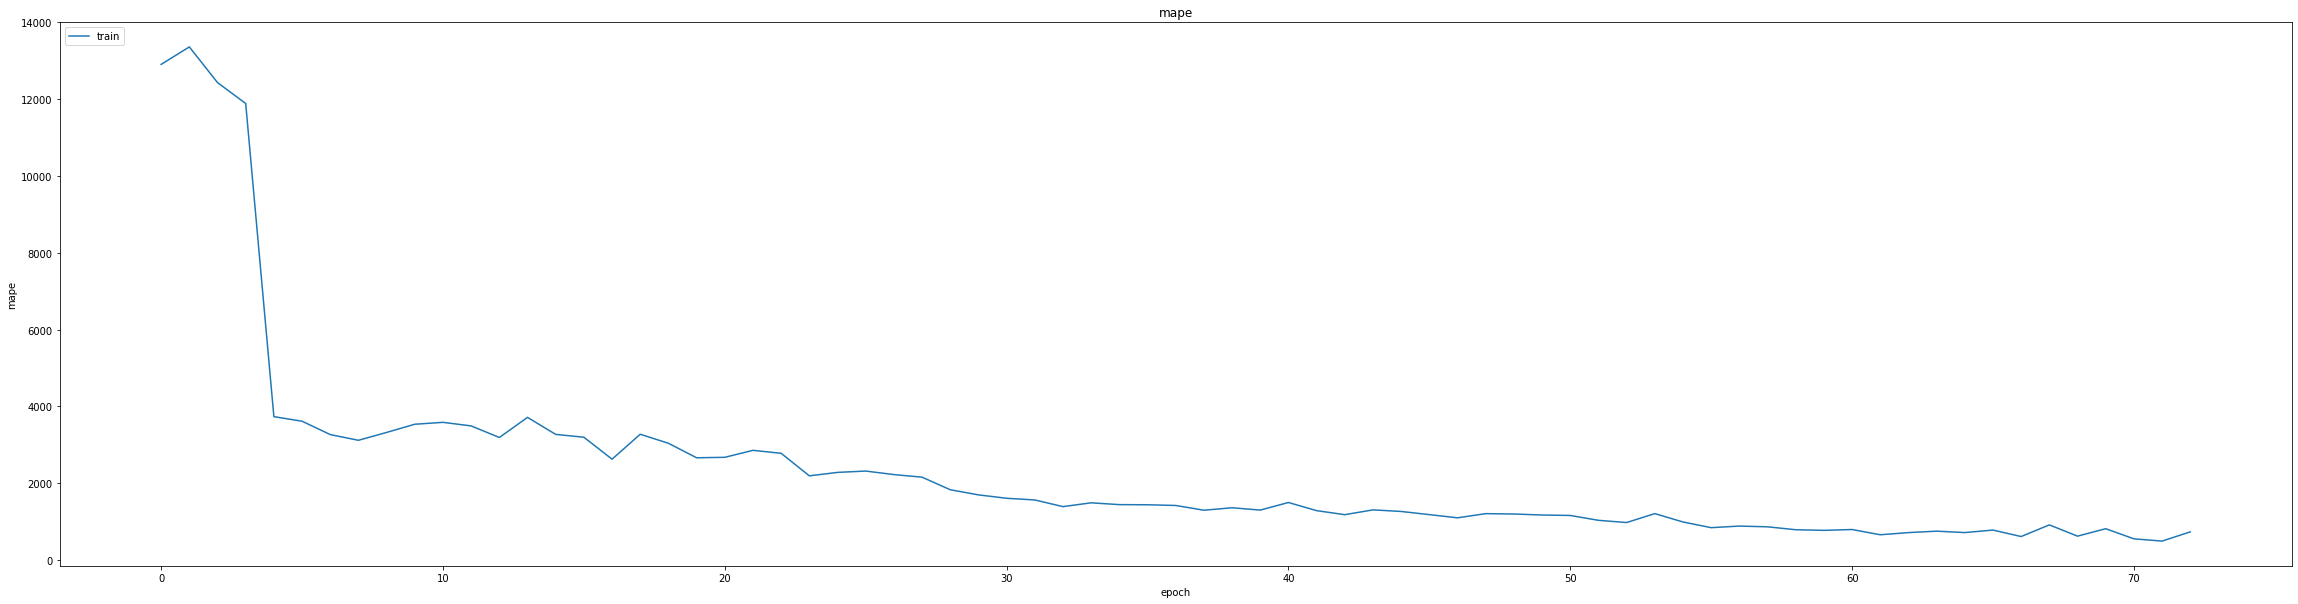

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016853881999850273
0.021172931417822838
234/234 [==============================] - 11s 36ms/step
0.9312247518429035


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0149 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 1233.7180
Epoch 1: val_mse did not improve from 0.00045
464/464 [==============================] - 144s 290ms/step - loss: 0.0014 - mae: 0.0149 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 1233.7180 - val_loss: 0.0023 - val_mae: 0.0438 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0477 - val_mape: 17041.8750 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.0144e-04 - mae: 0.0076 - mse: 1.0144e-04 - root_mean_squared_error: 0.0101 - mape: 1223.5316
Epoch 2: val_mse did not improve from 0.00045
464/464 [==============================] - 130s 281ms/step - loss: 1.0144e-04 - mae: 0.0076 - mse: 1.0144e-04 - root_mean_squared_error: 0.0101 - mape: 1223.5316 - val_loss: 0.0018 - val_mae: 0.0387 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0423 - val_mape: 15292.2686 - lr: 0.0010
lr changed t

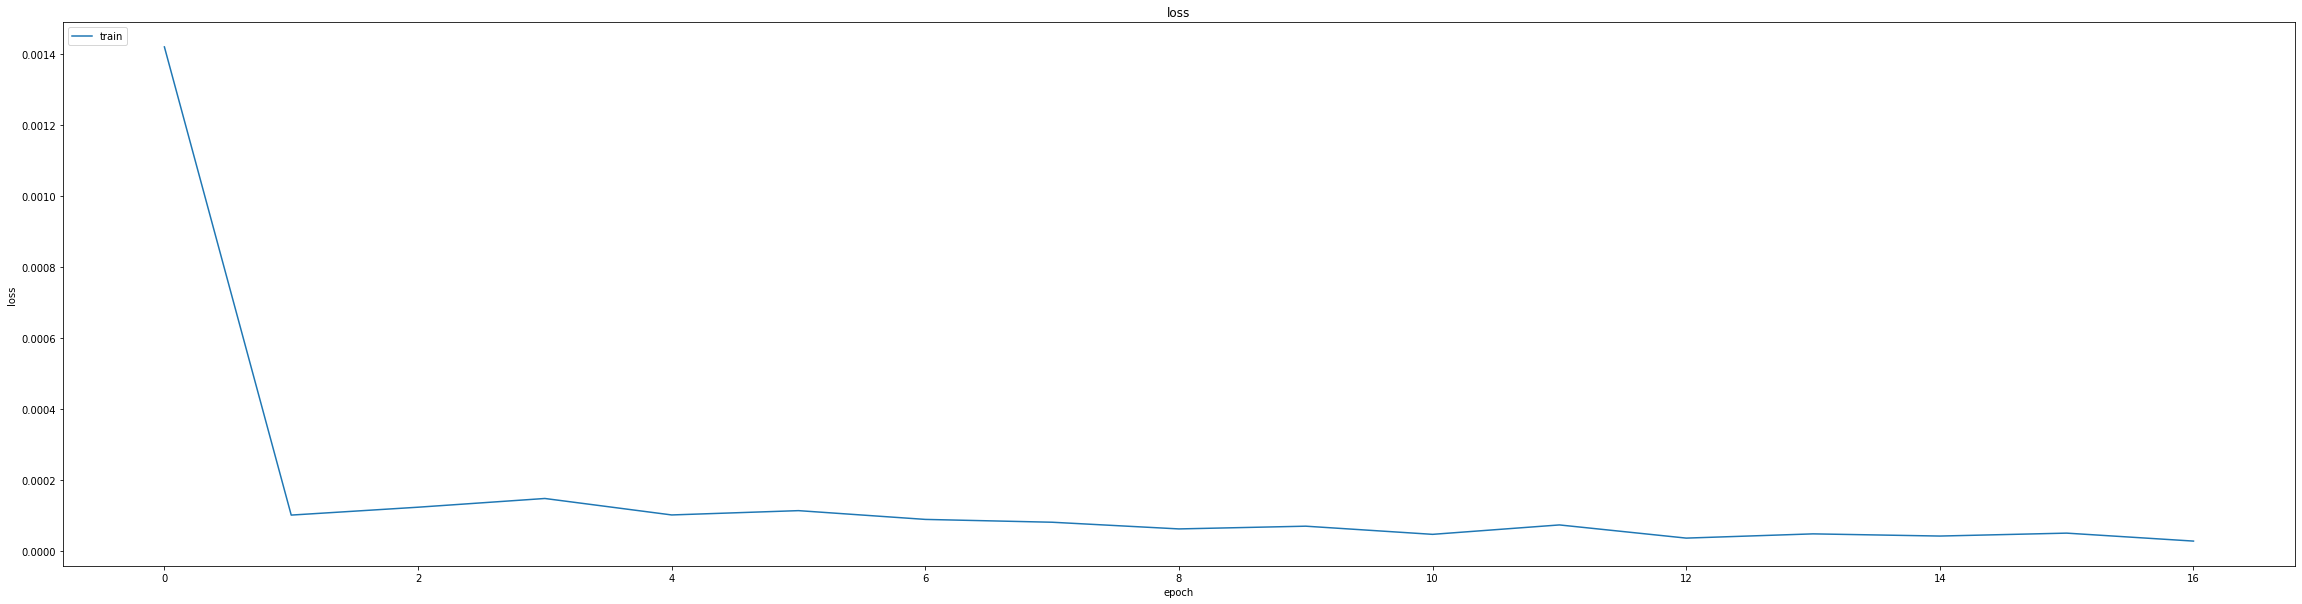

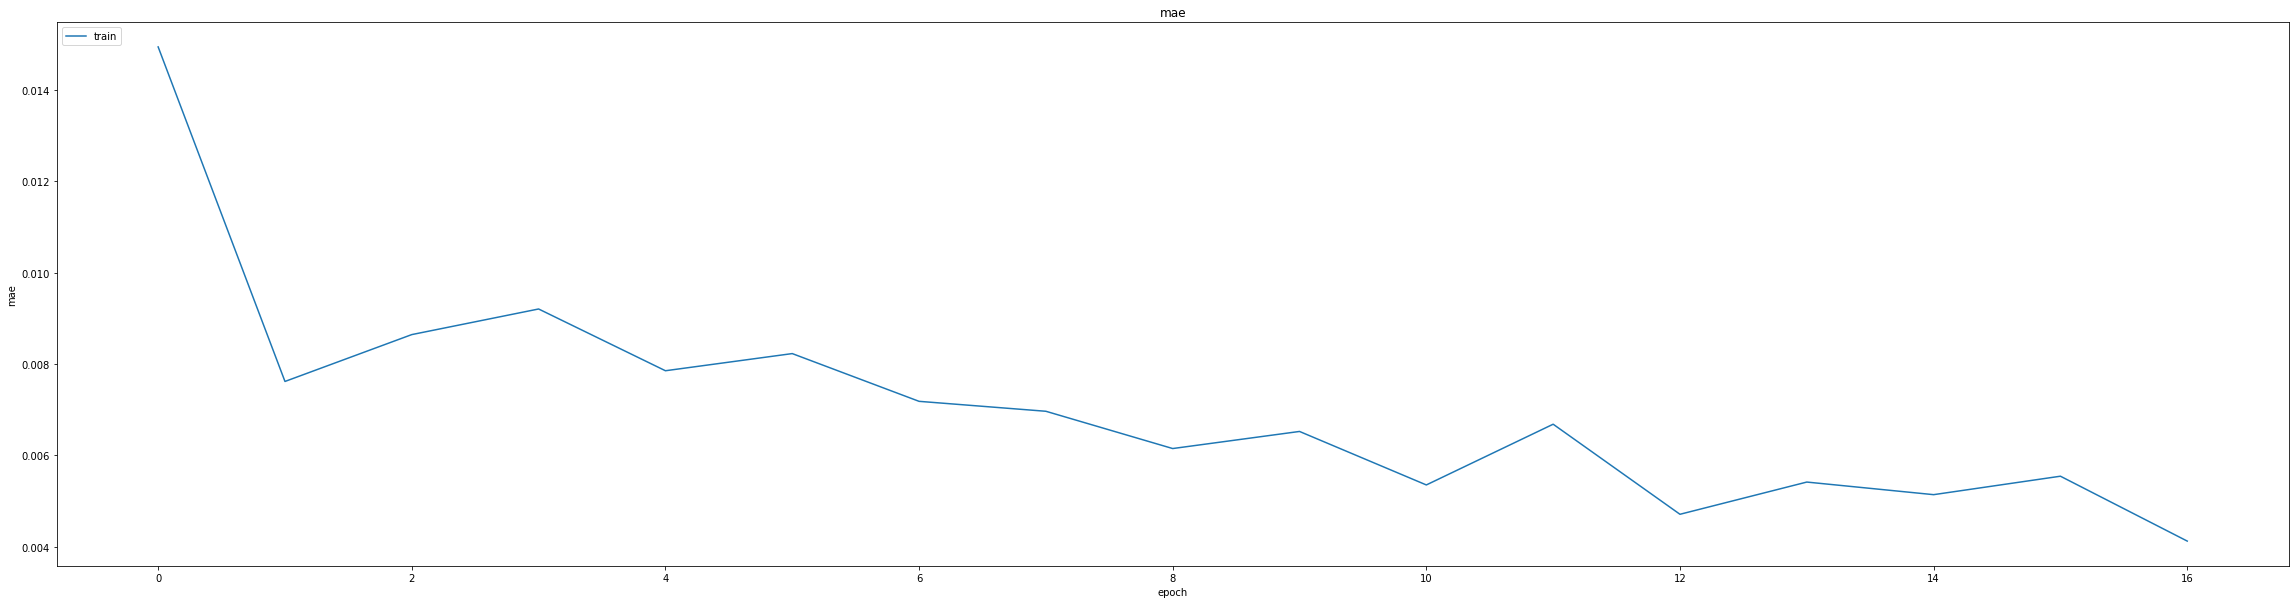

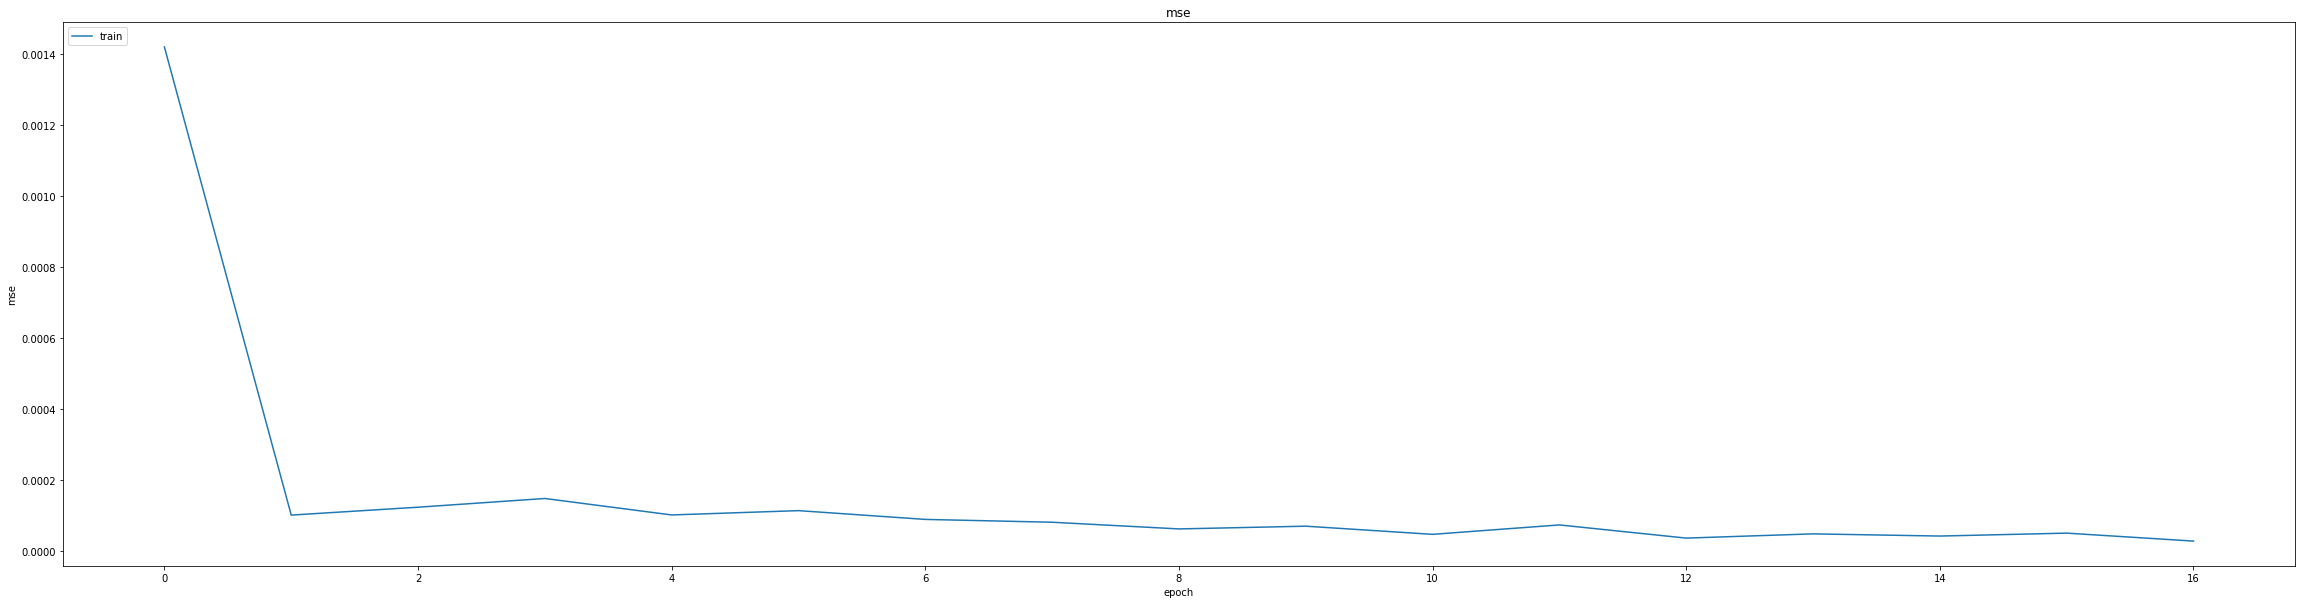

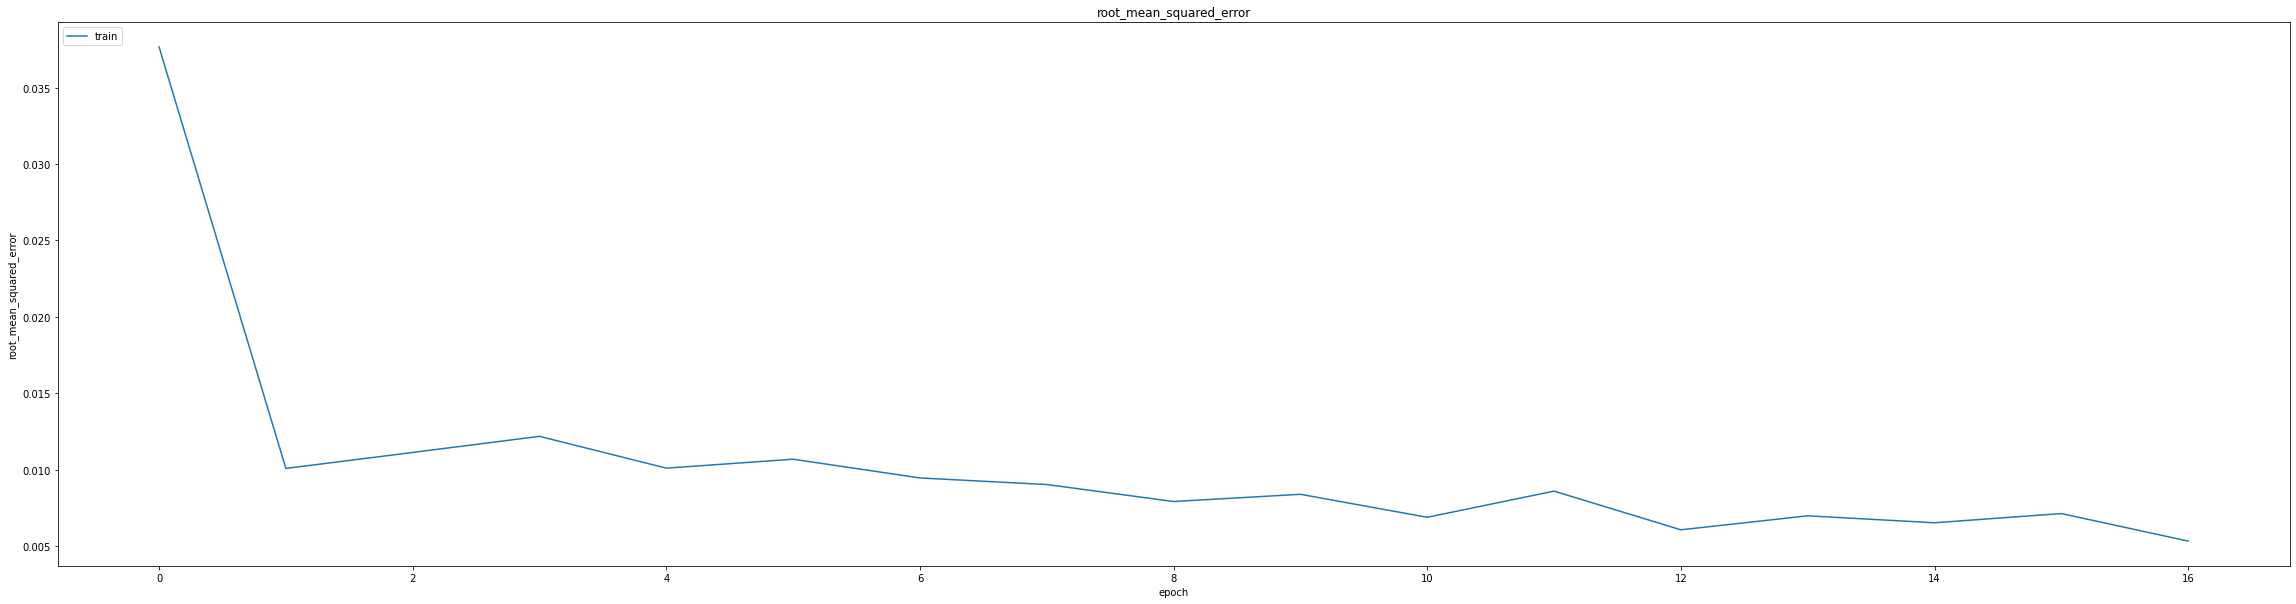

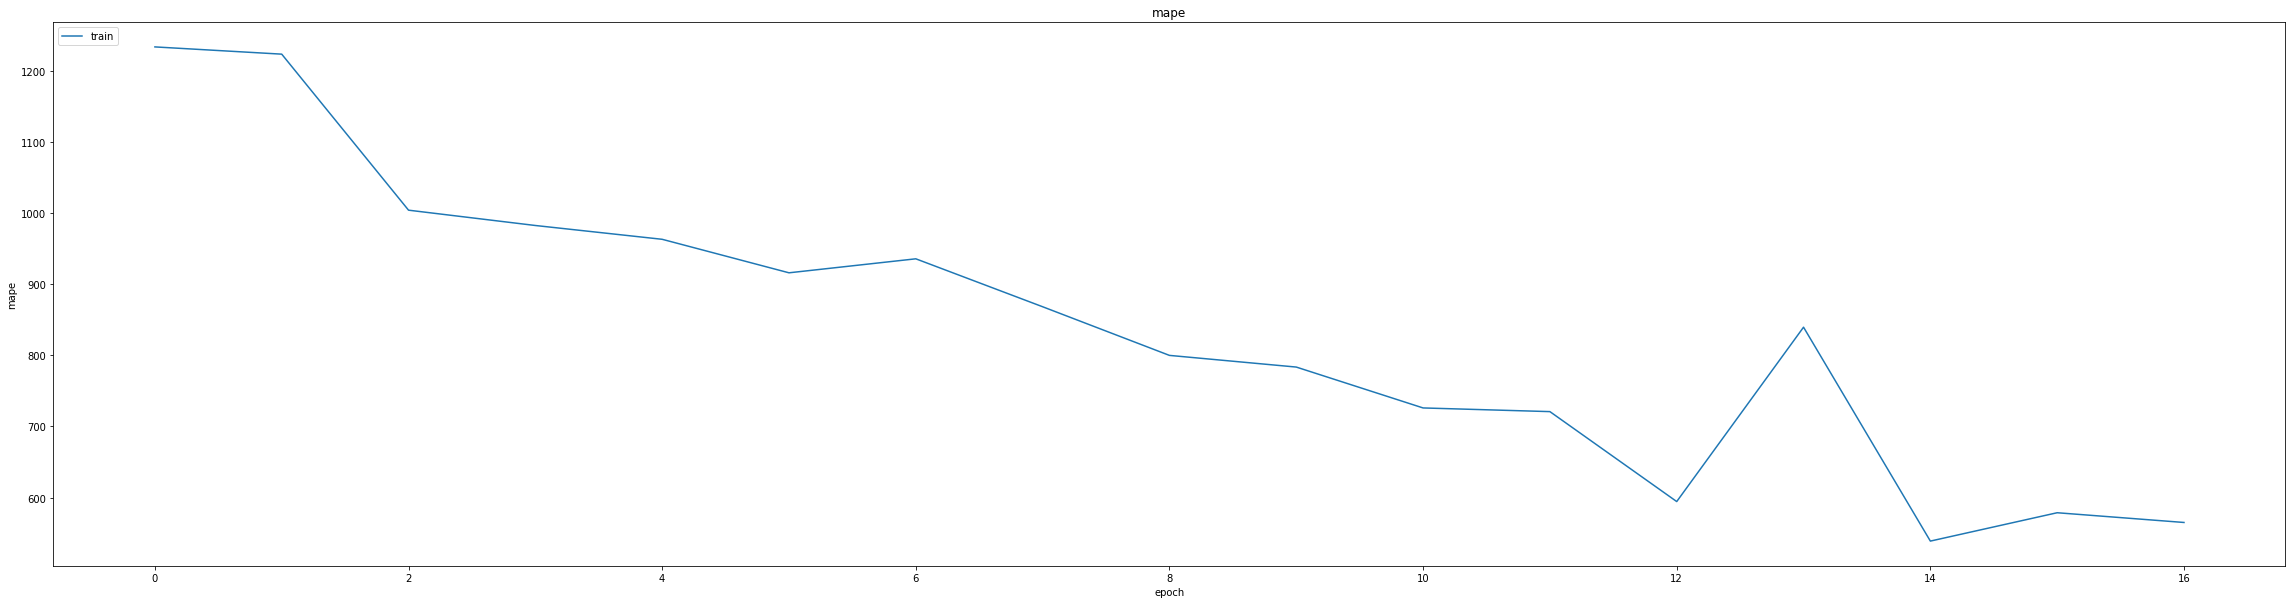

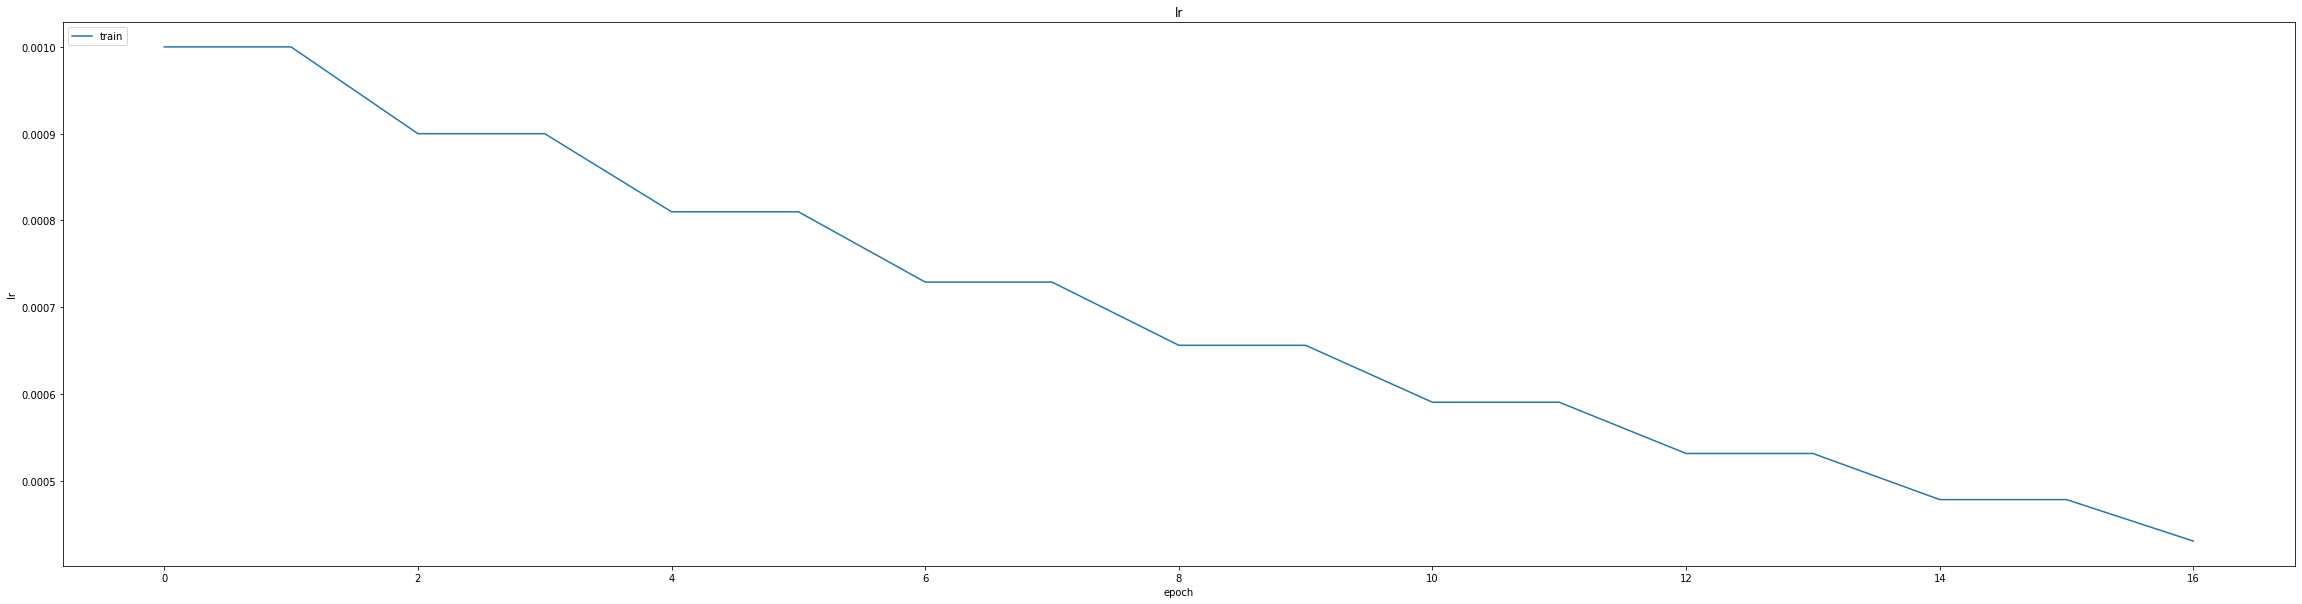

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03869978338479996
0.04232104495167732
234/234 [==============================] - 14s 61ms/step
0.9917899648642301


234/234 [==============================] - 18s 78ms/step


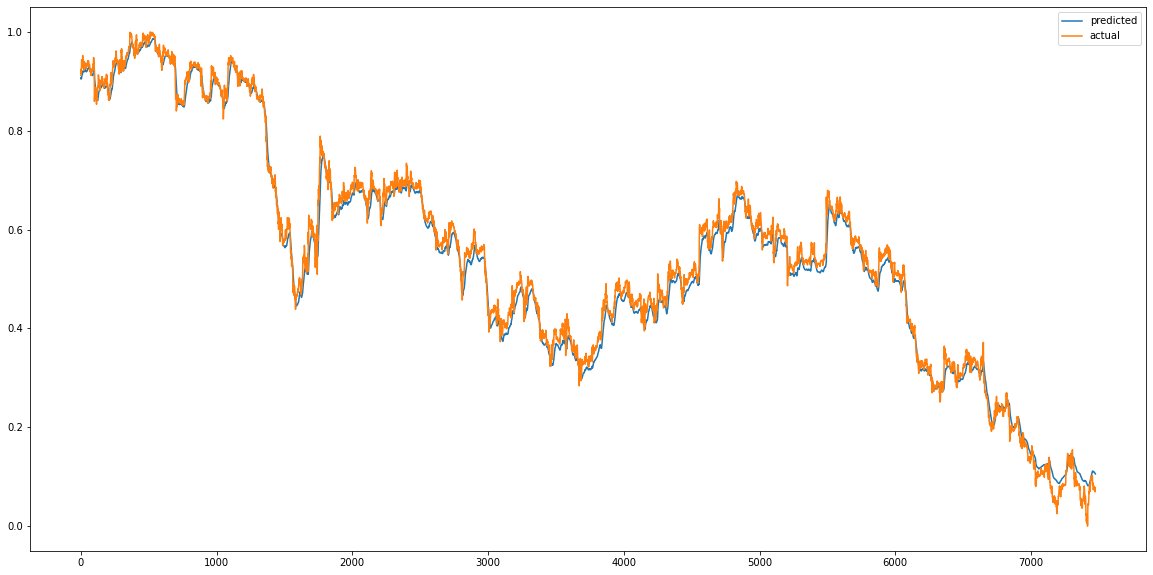

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


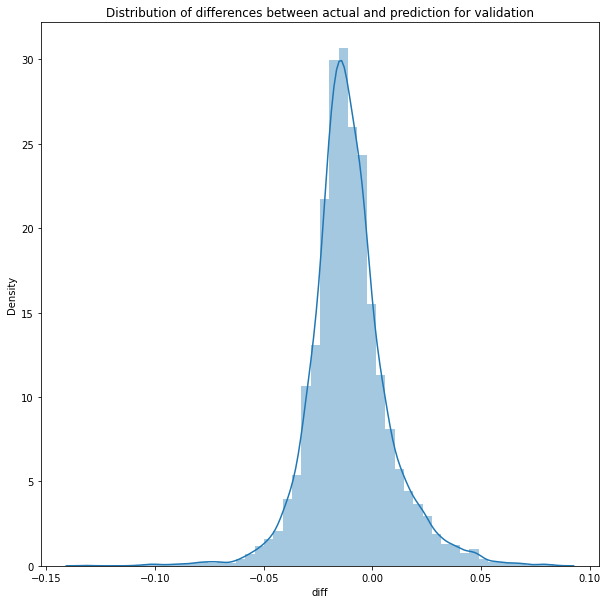

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 8s 37ms/step


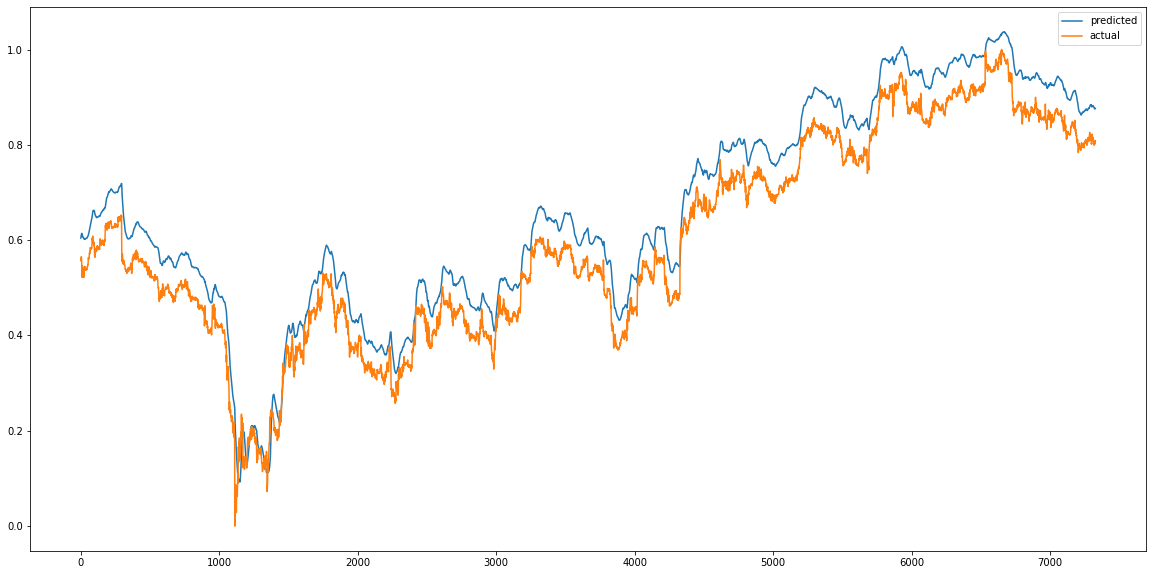

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


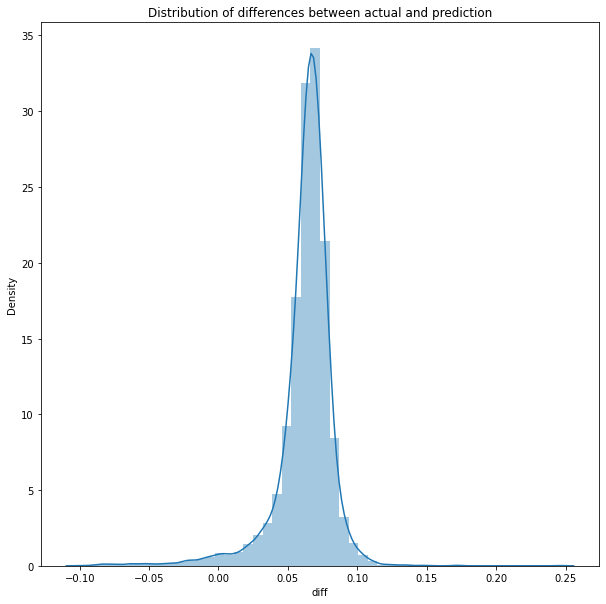

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0043493148727606935
MAE :  0.06379224588987495
RMSE  : 0.06594933565063937
229/229 [==============================] - 8s 37ms/step
R2_Score  : 0.9045484782482198


count    7327.000000
mean        0.062563
std         0.020863
min        -0.099075
25%         0.057224
50%         0.065755
75%         0.073031
max         0.245244
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint





checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 446.8807 - mae: 4.0665 - mse: 446.8807 - root_mean_squared_error: 21.1396 - mape: 1849892.0000
Epoch 1: val_mse improved from inf to 0.26773, saving model to weights.best.hdf5
464/464 [==============================] - 128s 263ms/step - loss: 446.8807 - mae: 4.0665 - mse: 446.8807 - root_mean_squared_error: 21.1396 - mape: 1849892.0000 - val_loss: 0.2677 - val_mae: 0.4615 - val_mse: 0.2677 - val_root_mean_squared_error: 0.5174 - val_mape: 136265.6719
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0868 - mae: 0.2322 - mse: 0.0868 - root_mean_squared_error: 0.2946 - mape: 13806.3818
Epoch 2: val_mse improved from 0.26773 to 0.09021, saving model to weights.best.hdf5
464/464 [==============================] - 123s 265ms/step - loss: 0.0868 - mae: 0.2322 - mse: 0.0868 - root_mean_squared_error: 0.2946 - mape: 13806.3818 - val_loss: 0.0902 - val_mae: 0.2531 - val_mse: 0.0902 - val_root_mean_square

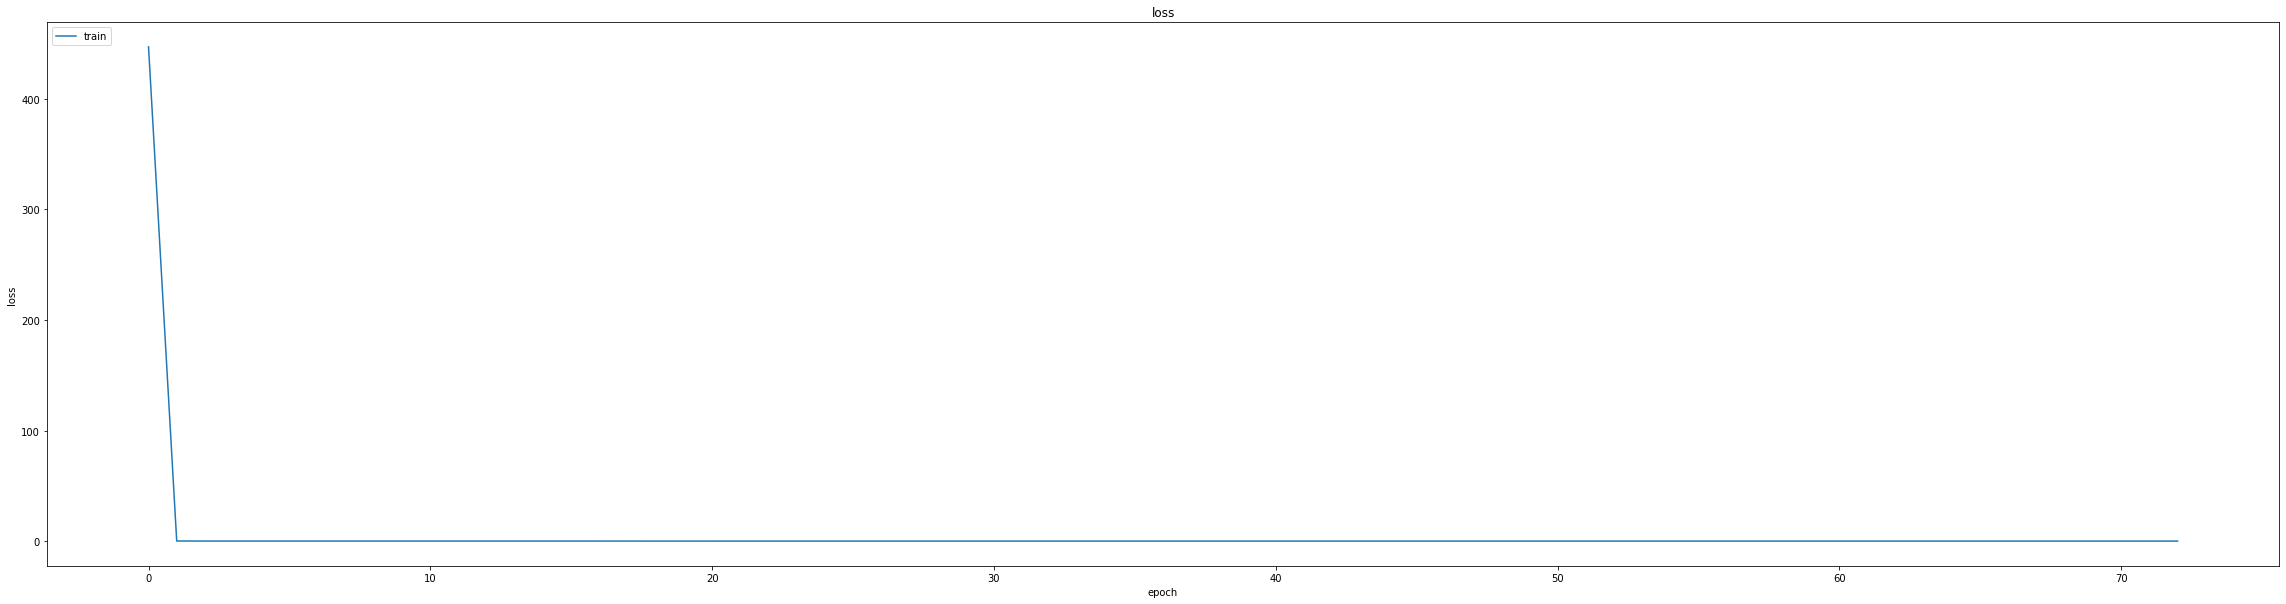

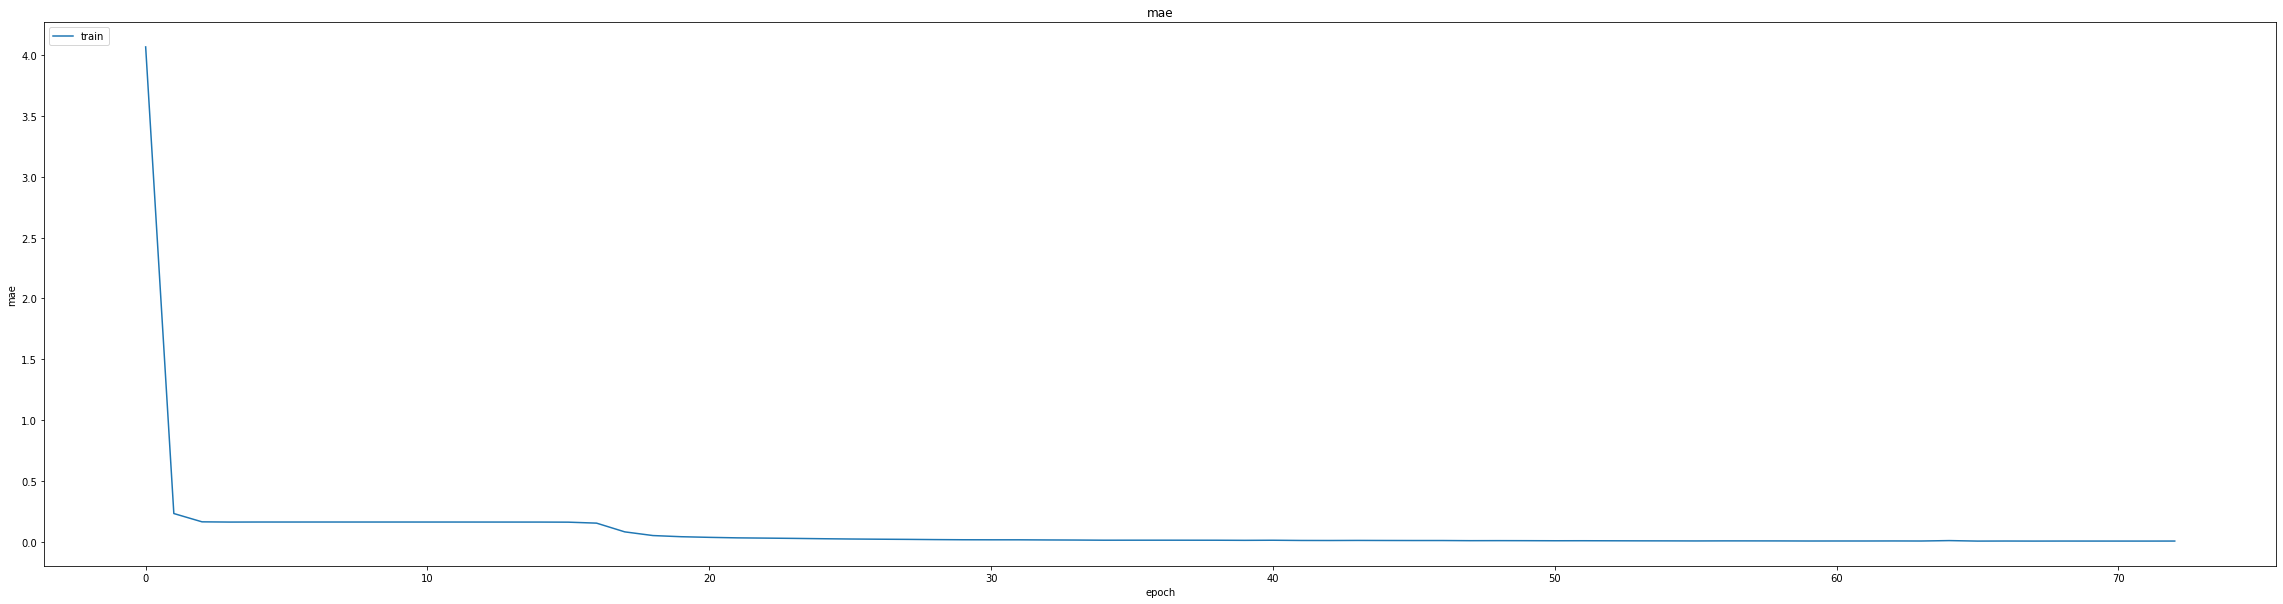

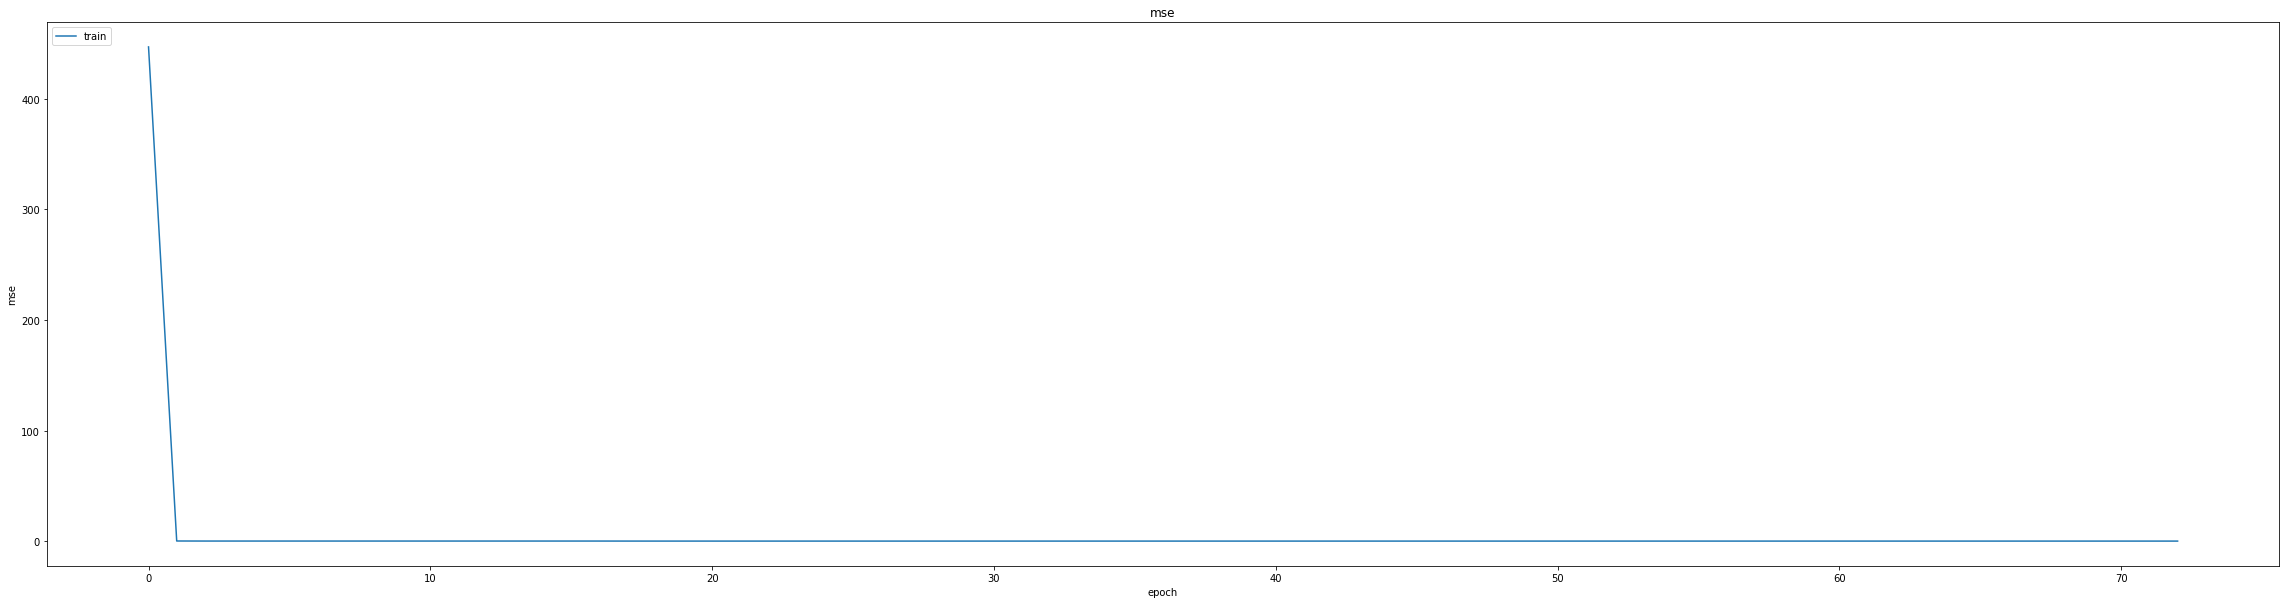

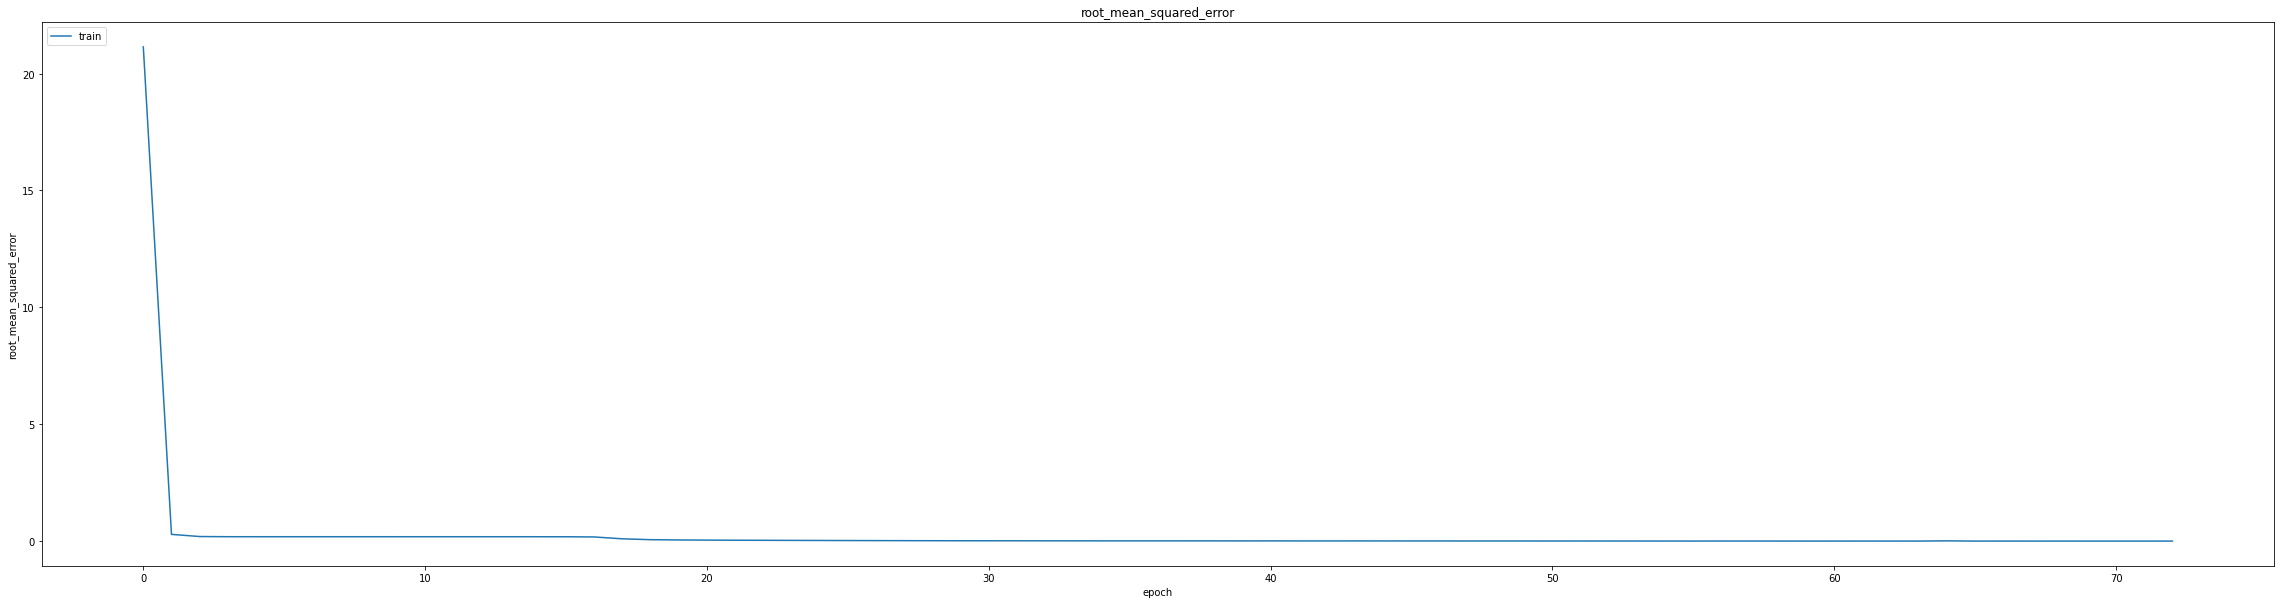

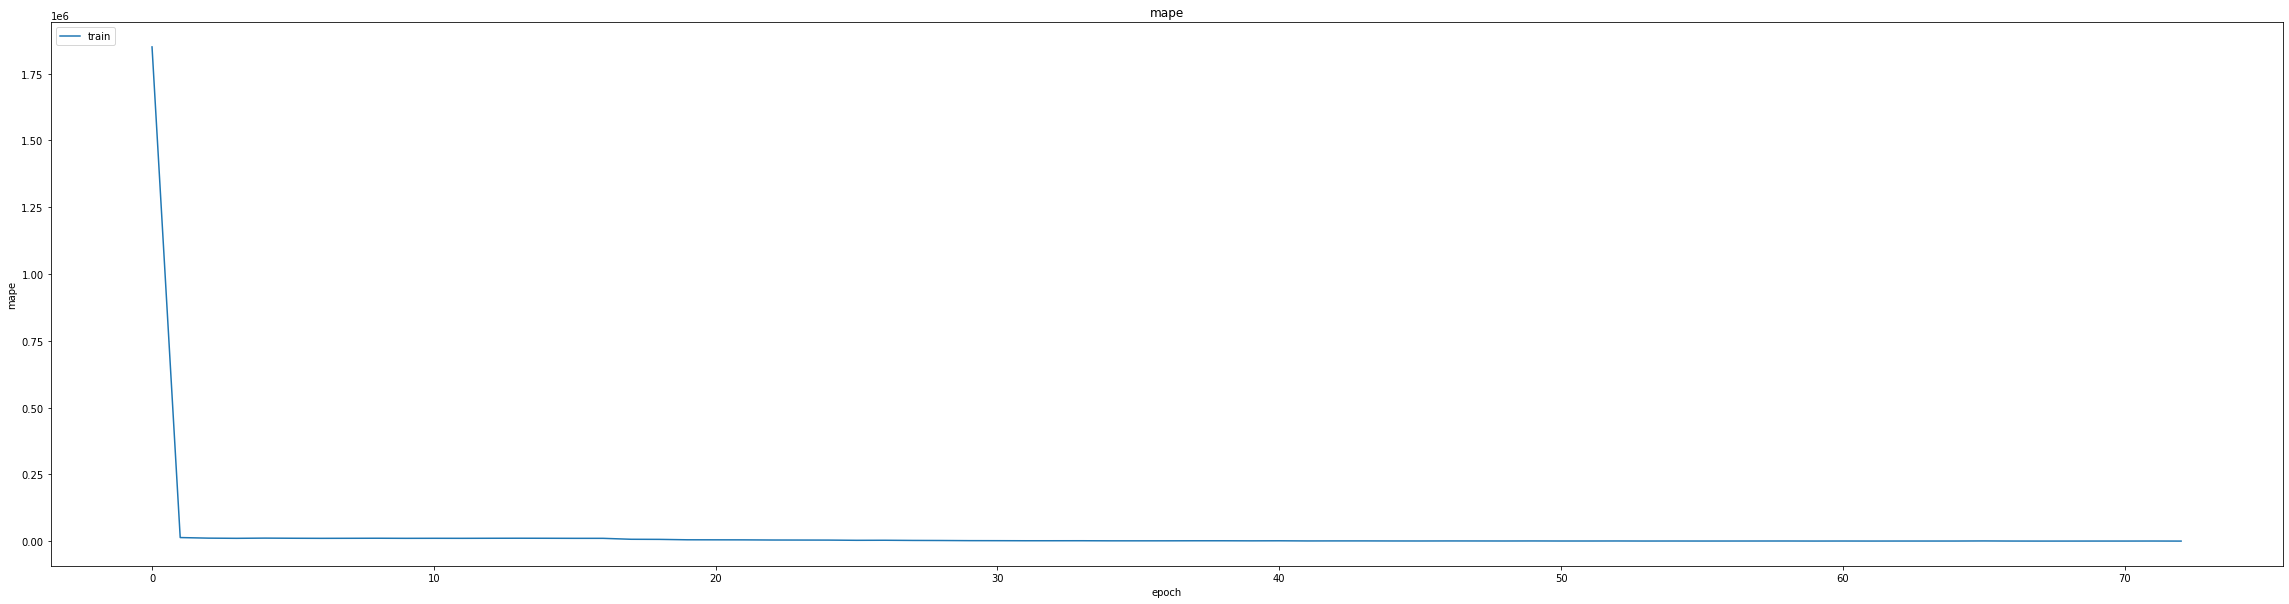

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015292330645024776
0.02128024399280548
234/234 [==============================] - 11s 41ms/step
0.9694207505191383


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

In [ ]:
Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0177 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 1452.7767
Epoch 1: val_mse did not improve from 0.00045
464/464 [==============================] - 134s 274ms/step - loss: 0.0014 - mae: 0.0177 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 1452.7767 - val_loss: 0.0011 - val_mae: 0.0276 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mape: 12163.8369 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.8394e-04 - mae: 0.0105 - mse: 1.8394e-04 - root_mean_squared_error: 0.0136 - mape: 970.7325
Epoch 2: val_mse did not improve from 0.00045
464/464 [==============================] - 126s 272ms/step - loss: 1.8394e-04 - mae: 0.0105 - mse: 1.8394e-04 - root_mean_squared_error: 0.0136 - mape: 970.7325 - val_loss: 0.0014 - val_mae: 0.0310 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 11098.7334 - lr: 0.0010
lr changed to 

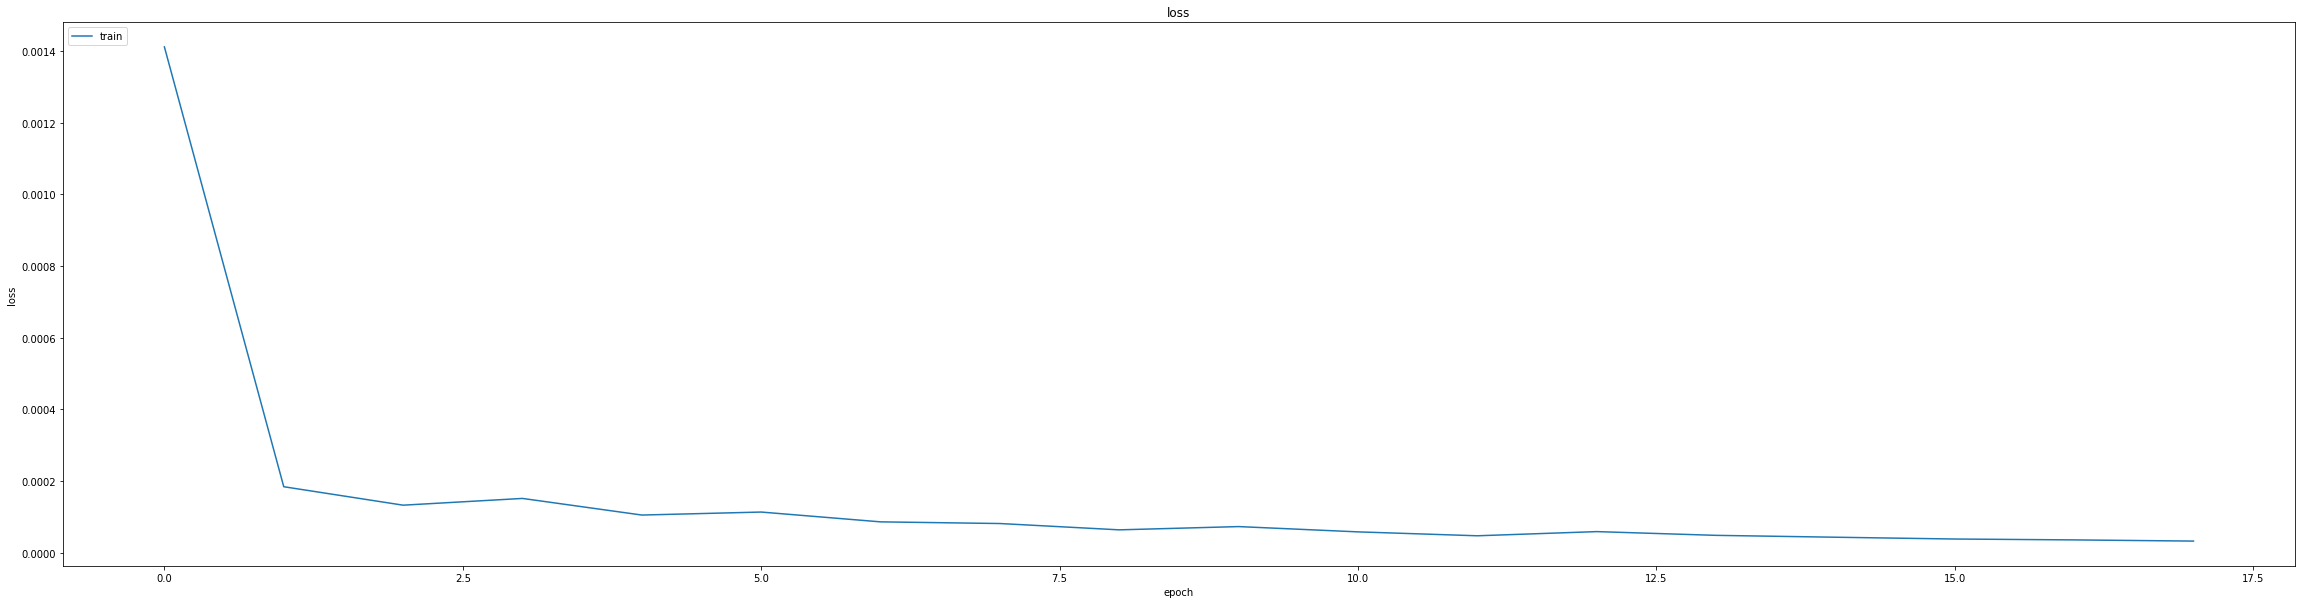

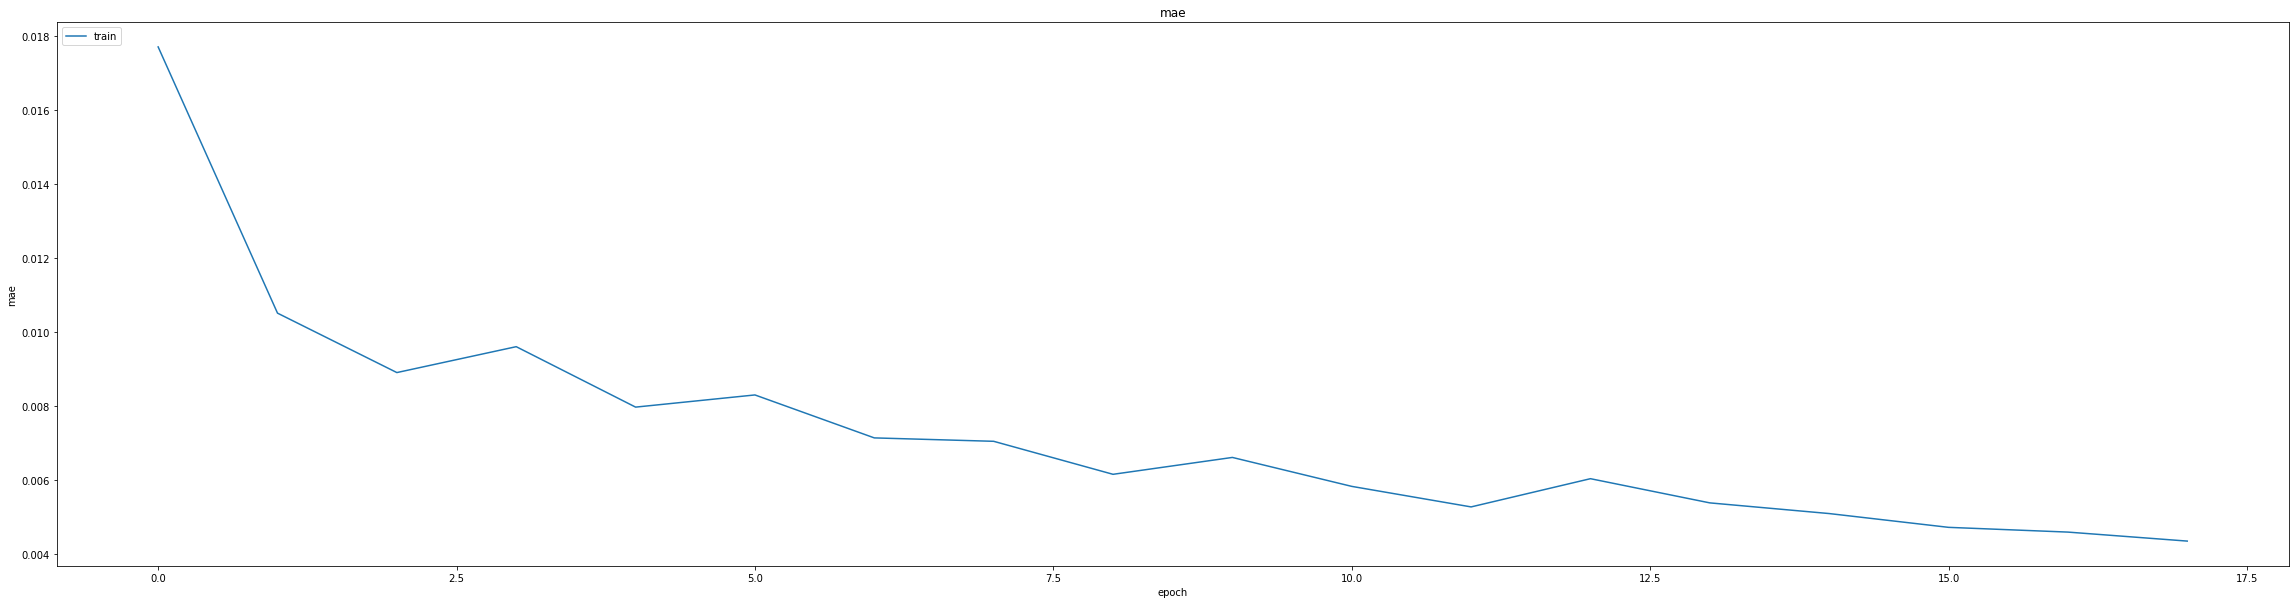

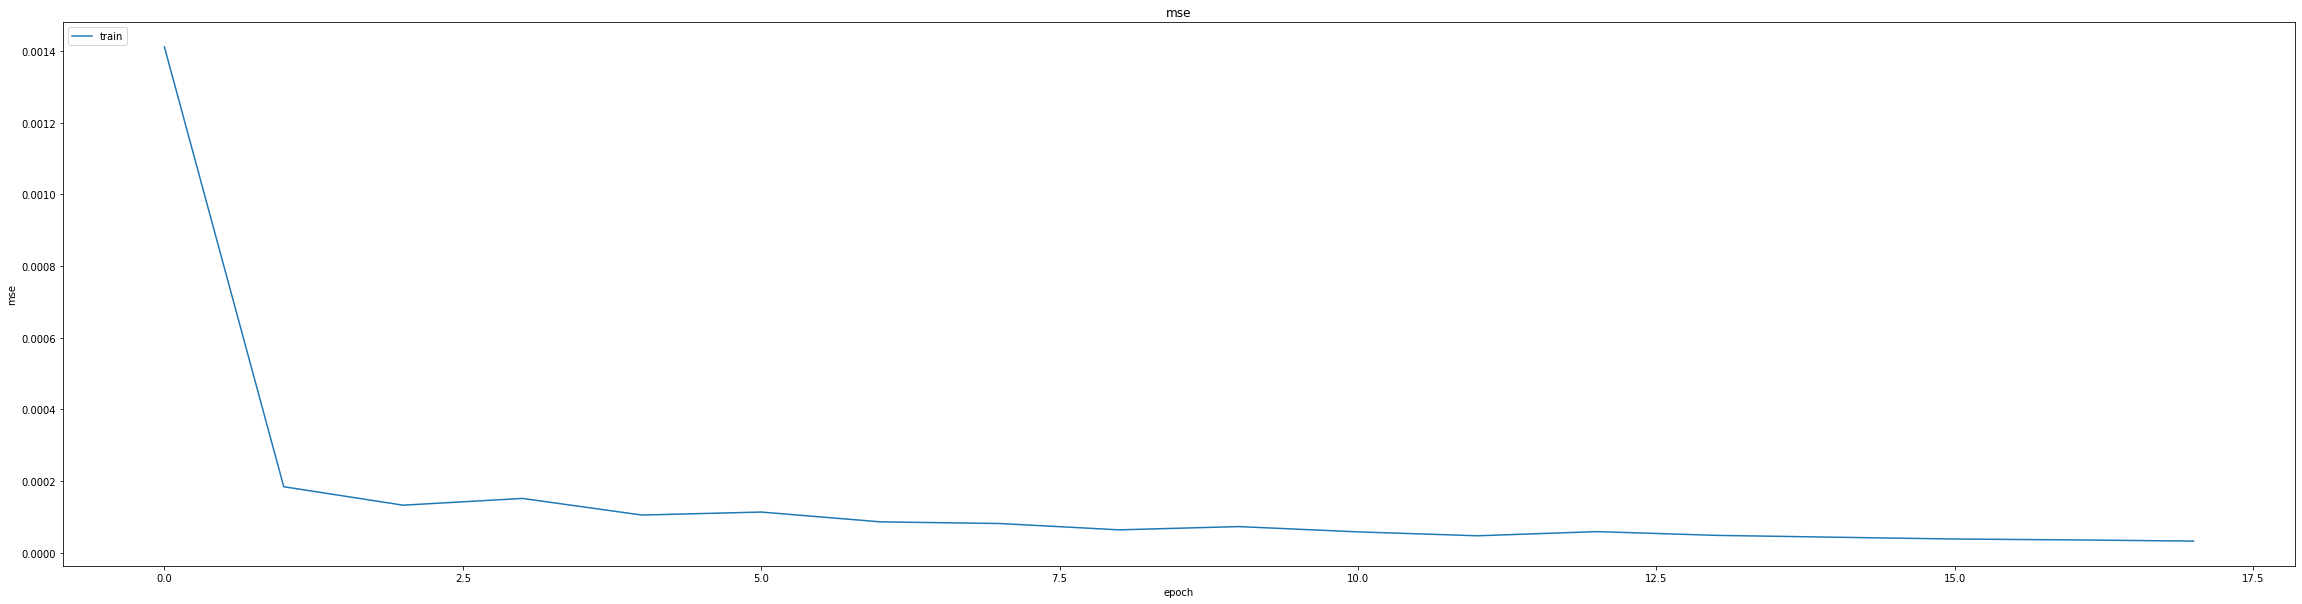

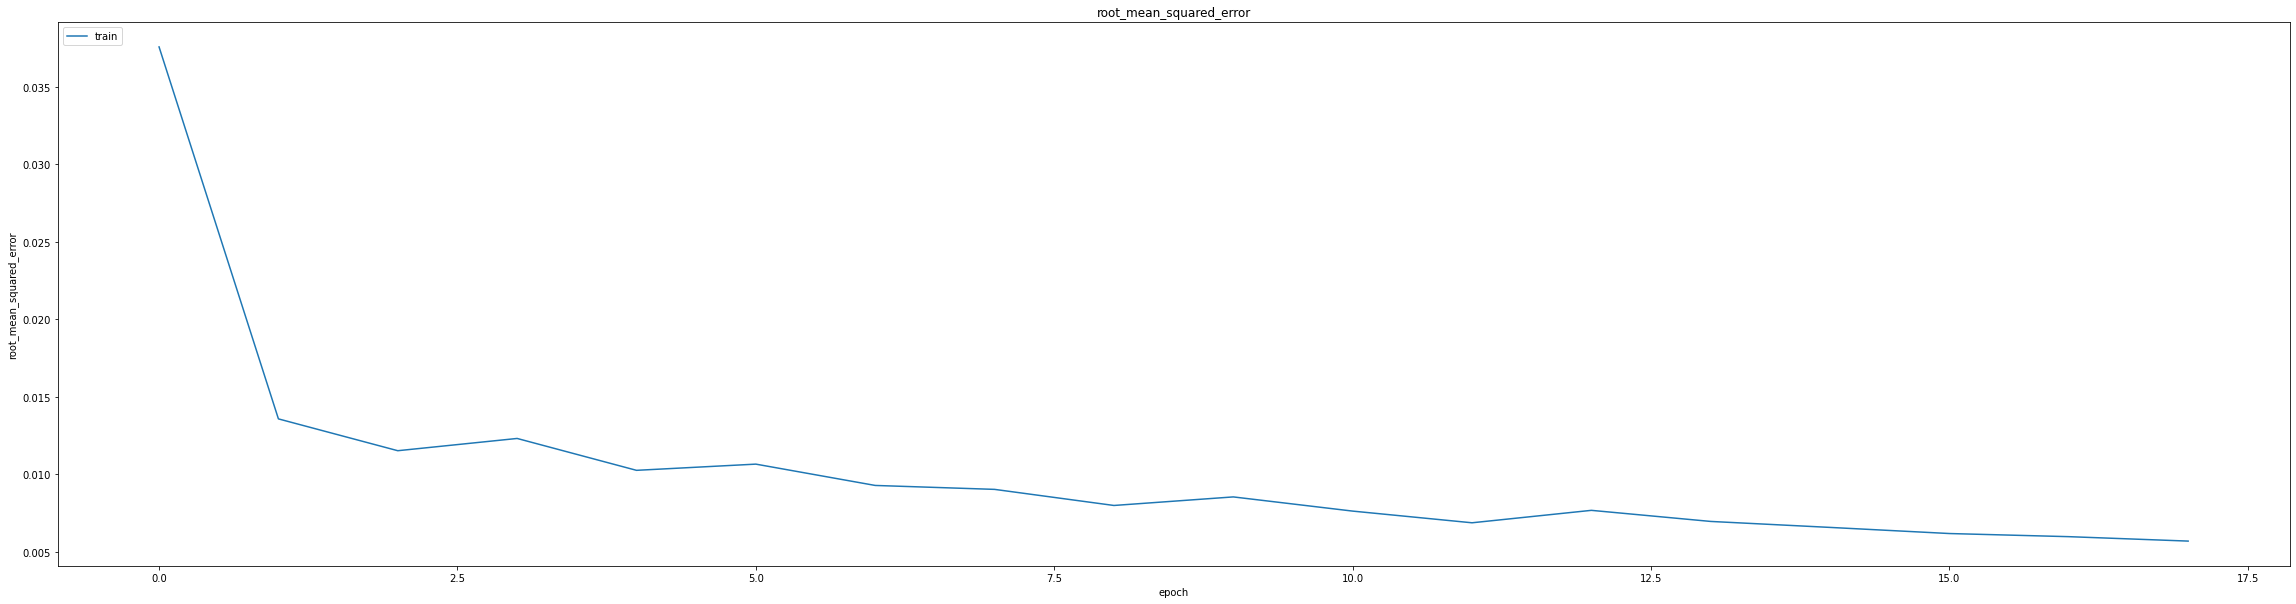

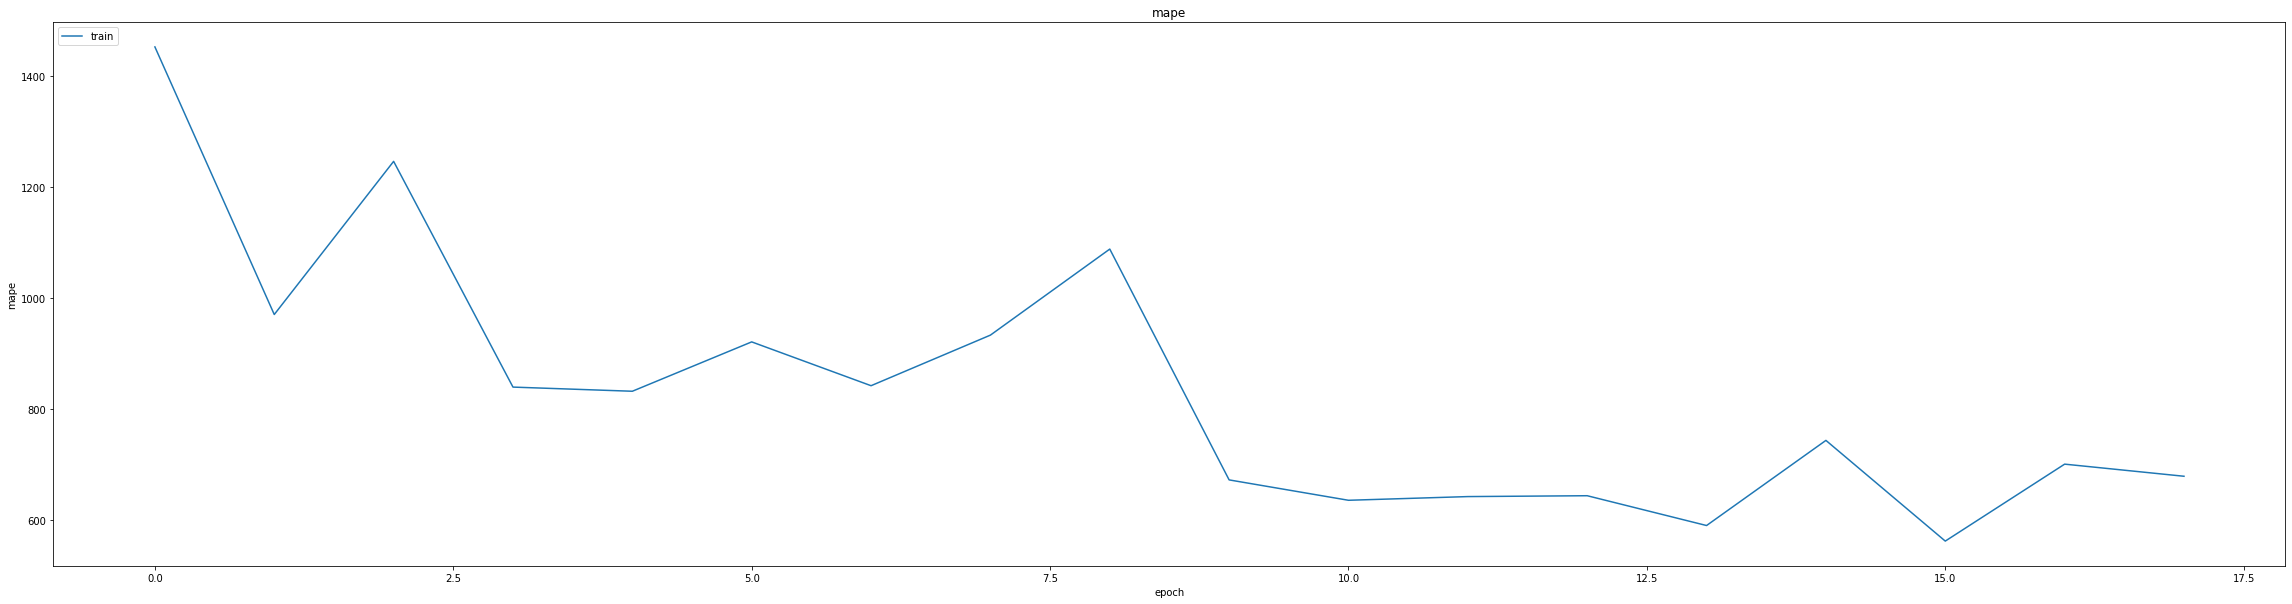

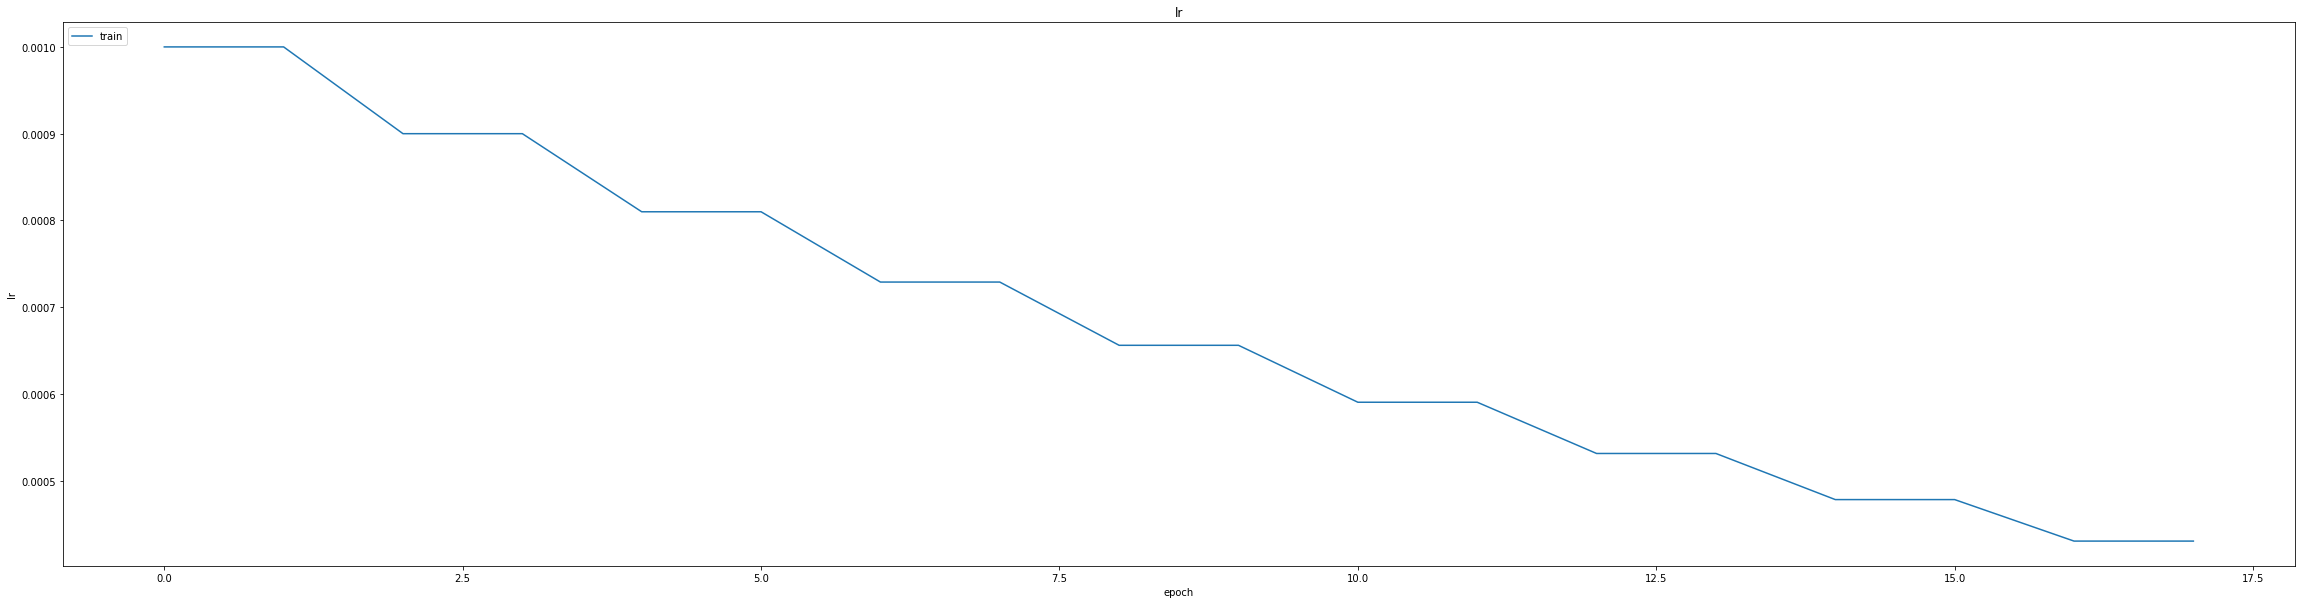

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.021791372448205948
0.0274494756013155
234/234 [==============================] - 9s 35ms/step
0.9726388770854332


In [ ]:
model.load_weights("weights.best.hdf5")

234/234 [==============================] - 8s 35ms/step


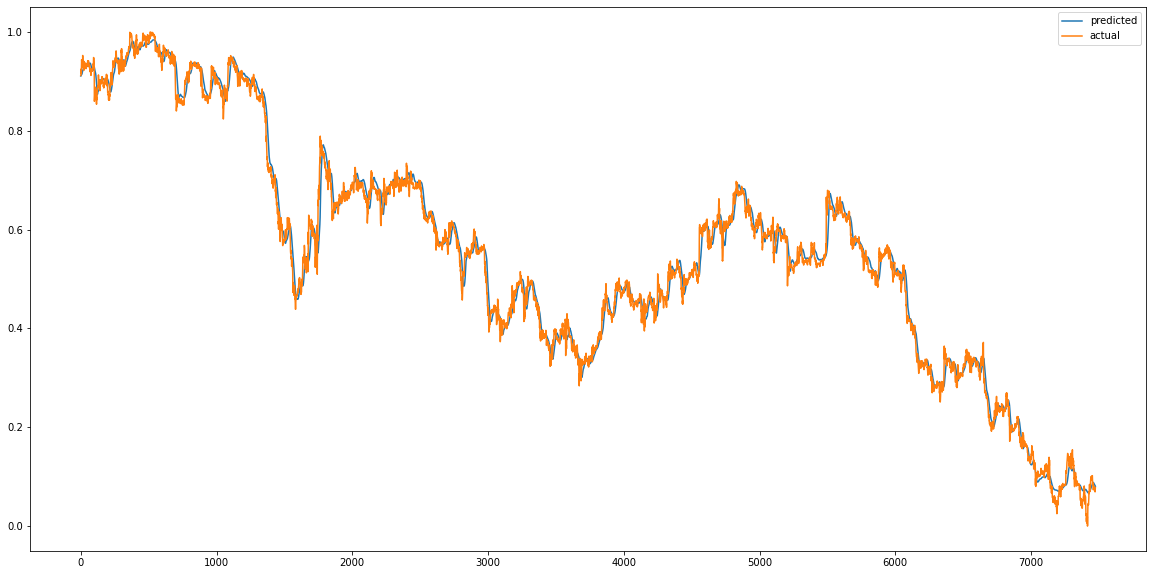

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


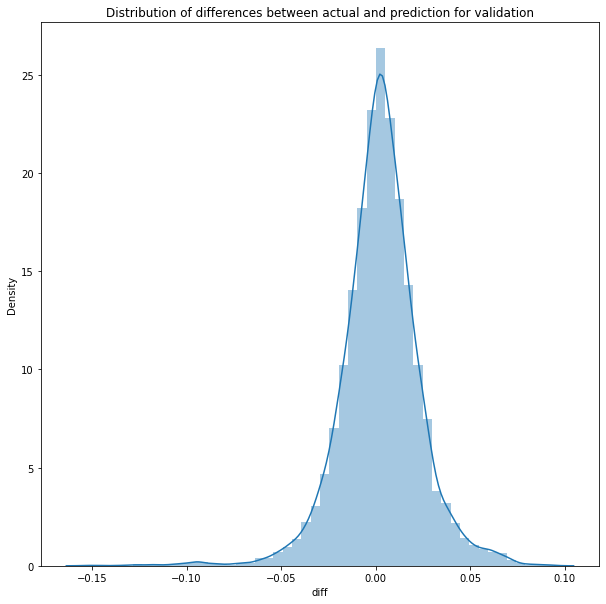

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 39ms/step


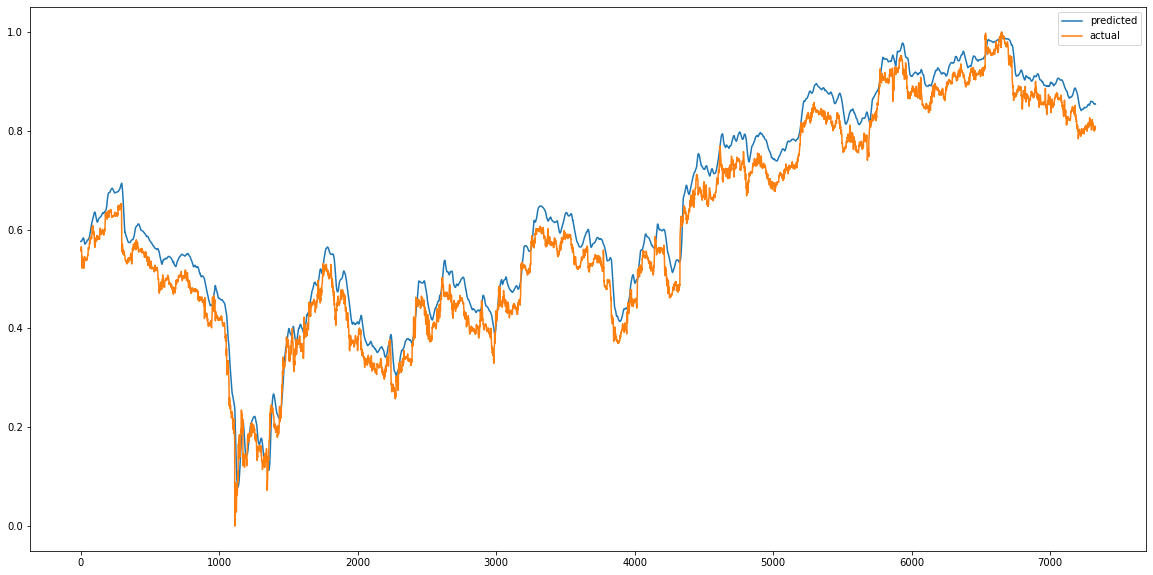

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


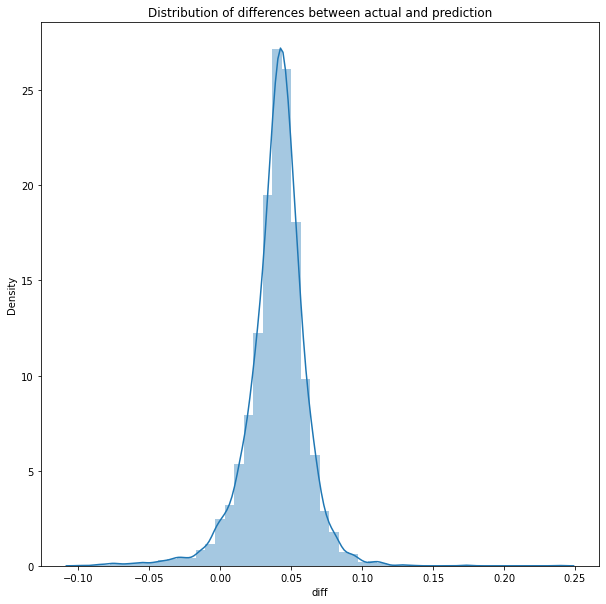

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print(test_r2_scr)
from math import sqrt
rmse=sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

print(rmse)
predictions['diff'].describe()

MSE :  0.0020292642588790946
MAE :  0.041424198363647954
229/229 [==============================] - 8s 35ms/step
0.955465086526874
0.04504735573681428


count    7327.000000
mean        0.039788
std         0.021124
min        -0.097813
25%         0.030567
50%         0.041561
75%         0.050991
max         0.238370
Name: diff, dtype: float64